In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import polars as pl


In [2]:
#NPOB = 20
#NGEN = 250
#Pc = 0.8
#Pm = 0.2
#C = 0.4
NRES = 10
NSAMPLE = 25
random_vector = None

In [3]:
# reaf the data from the excel file
data = pd.read_excel('Datos TablaInversiones.xlsx')
data = data.dropna()
data = data.reset_index(drop=True)
# rename columns
data.columns = ["Empresa","Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
data

,Empresa,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,IBM,-0.012546,0.045071,0.023199,0.009866,-0.034398,-0.034401,-0.044192,0.036618,0.010112,0.020807,-0.047942,0.046991
1,Nvidia,0.033244,-0.028766,-0.031818,-0.03166,-0.019576,0.002476,-0.006805,-0.020877,0.011185,-0.036051,-0.020786,-0.013364
2,Kellogs,-0.004393,0.028518,-0.030033,0.001423,0.009241,-0.045355,0.010754,-0.032948,-0.043495,0.044889,0.046563,0.03084
3,Microsoft,-0.019539,-0.040233,0.018423,-0.005985,-0.037796,-0.000482,-0.046561,0.040932,-0.024122,0.016252,-0.018829,0.002007
4,BP,0.004671,-0.031515,0.046958,0.027513,0.04395,0.039483,0.00979,0.042187,-0.041151,-0.030402,-0.045477,-0.017467
5,UPS,-0.011132,-0.022865,0.032874,-0.014325,-0.021907,0.00427,-0.035908,0.03022,-0.042545,0.048689,0.027224,-0.030128
6,Amazon,-0.049448,0.031546,0.020686,0.022901,0.027127,-0.042596,-0.014153,-0.038413,0.03631,0.01233,-0.01691,-0.043644
7,Intel,-0.018902,-0.017482,0.022961,0.013756,0.038721,-0.002779,-0.038041,0.021324,0.026079,0.006128,0.027097,-0.00062
8,Ford,0.002273,-0.007246,-0.047458,-0.039211,-0.046857,0.013641,-0.018564,0.000857,0.040757,-0.025071,-0.008962,0.025555
9,Exxon,-0.02712,-0.042302,-0.021025,-0.033878,0.04297,0.030812,0.01334,0.037146,0.030367,-0.031343,0.039256,0.003934


In [4]:
import plotly as py
import plotly.io as pio
import plotly.express as px

# plot every company performance in the year show them all in a plot
x = data.columns[1:]
y = data.iloc[0,1:]
#fig = px.line(x=x, y=y, title='Performance de las empresas del dataset')
fig = py.graph_objs.Figure()
# add title
fig.update_layout(title='Performance de las empresas del dataset')
for i in range(1, data.shape[0]):
    y = data.iloc[i,1:]
    fig.add_scatter(x=x, y=y, mode='lines', name=data.iloc[i,0])
fig.show()







In [5]:
ri_cache = {}

def ri(copañia):
    if copañia not in ri_cache:
        ri_cache[copañia] = data.loc[data["Empresa"] == copañia].iloc[0, 1:].sum()/12
    return ri_cache[copañia]
    #add the row of the company and divide by 12
    #return (data.loc[data["Empresa"] == copañia].iloc[0, 1:].sum())/12

ri("IBM")

0.0015987499999999993

In [6]:
def cromosoma():
    # generate a vector of 20 random numbers between 0 and 1 that sum 1
    np.random.seed()
    c = np.random.rand(20)
    c = c/sum(c)
    return c

In [7]:
def calcularRc(cromosoma):
    rc = 0
    for i in range(20):
        rc += cromosoma[i]*ri(data.iloc[i]["Empresa"])
    return rc

In [8]:
def calcularOi(i):
    resultado = 0
    for m in range(12):
        resultado += np.square(data.iloc[i][m+1] - ri(data.iloc[i]["Empresa"]))
    return np.sqrt(resultado/11)

calcularOi(1)

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.02055088711422984

In [9]:
def calcularOc(cromosoma):
    resultado = 0
    for i in range(20):
        for j in range(20):
            resultado += cromosoma[i]*cromosoma[j]*calcularOi(i)*calcularOi(j)
    return np.sqrt(0.25 * resultado)

In [10]:
def ratioSharpe(cromosoma):
    rc = calcularRc(cromosoma)
    desv = calcularOc(cromosoma)
    return (rc - 0.003757)/desv

In [11]:
def ruleta(fitness_gen, fitness_total, Pm):
  """
  Función que decide si mutar un gen usando la ruleta.

  Args:
    fitness_gen: Fitness del gen a evaluar.
    fitness_total: Fitness total del cromosoma.
    Pm: Probabilidad de mutación individual.

  Returns:
    True si el gen debe mutarse, False en caso contrario.
  """
  fitness_relativo = fitness_gen / fitness_total
  r = np.random.random()

  # Aplicar ruleta
  if r < fitness_relativo * Pm:
    return True
  else:
    return False

In [12]:
def ruletaEncruzamiento(fitness_gen, fitness_total, Pc):
  """
  Función que decide si cruzar un gen usando la ruleta.

  Args:
    fitness_gen: Fitness del gen a evaluar.
    fitness_total: Fitness total del cromosoma.
    Pc: Probabilidad de cruzamiento.

  Returns:
    True si el gen debe cruzarse, False en caso contrario.
  """
  fitness_relativo = fitness_gen / fitness_total
  r = np.random.random()

  # Aplicar ruleta
  if r < fitness_relativo * Pc:
    return True
  else:
    return False

In [13]:
def mutacion(cromosomaProcesado, Pm):
    for gen in range(len(cromosomaProcesado)):
        # Cambiar a el metodo de la ruleta
        #if ruleta(gen, fitness, Pm):
        if np.random.rand() < Pm:
            # generate a random number between 0 and 1
            nuevoGen = (np.random.rand() - 0.5) * C
            if nuevoGen < 0:
                nuevoGen = 0
            cromosomaProcesado[gen] = nuevoGen
            del nuevoGen


    return (cromosomaProcesado/sum(cromosomaProcesado))

In [14]:
def entrecruzamiento(cromosoma1, cromosoma2, Pc):
    # generate a random number between 0 and 1
    #if metodoRuleta(cromosoma1, Pc):
    r = np.random.random()
    if r < Pc:
        # generate a random number between 0 and 20
        punto = np.random.randint(20)
        # generate two new chromosomes
        cromosoma1 = np.concatenate((cromosoma1[:punto], cromosoma2[punto:]))
        cromosoma2 = np.concatenate((cromosoma2[:punto], cromosoma1[punto:]))

        # if there is a negative number, change it to 0
        cromosoma1[cromosoma1 < 0] = 0
        cromosoma2[cromosoma2 < 0] = 0
        cromosoma1 = cromosoma1/sum(cromosoma1)
        cromosoma2 = cromosoma2/sum(cromosoma2)
    return cromosoma1, cromosoma2

In [15]:
def seleccionarHijos(df, fraccion, Pc, Pm):
    cromosomas = []
    fitness = []

    for _ in range(int(fraccion/2)):
        cromosoma1 = None
        cromosoma2 = None
        r = np.random.random()
        for i in range(df.shape[0]):
            if r < df["Probabilidad Acumulada"][i]:
                cromosoma1 = df["Cromosoma"][i]
                break
        r = np.random.random()
        for i in range(df.shape[0]):
            if r < df["Probabilidad Acumulada"][i]:
                cromosoma2 = df["Cromosoma"][i]
                break

        # aplicar entrecruzamiento
        cromosoma1, cromosoma2 = entrecruzamiento(cromosoma1, cromosoma2, Pc)

        cromosoma1 = mutacion(cromosoma1, Pm)
        cromosoma2 = mutacion(cromosoma2, Pm)
        finess1 = ratioSharpe(cromosoma1)
        finess2 = ratioSharpe(cromosoma2)
        cromosomas.append(cromosoma1)
        cromosomas.append(cromosoma2)
        fitness.append(finess1)
        fitness.append(finess2)
        del cromosoma1, cromosoma2, finess1, finess2

    return cromosomas, fitness

Empezar con el entrenamiento

In [16]:
def cromosomaConsensoFunc(df1):
    cromosomal = []
    for i in range(20):
        columna = []
        for j in range(20):
            columna.append(df1["Cromosoma"][j][i])
            # calculate the median of the column
        median = np.median(columna)
        cromosomal.append(median)
        del columna, median
    return cromosomal




In [17]:
def entrenamiento(NPOB, NGEN, Pc, Pm, C):
  poblacion = []
  for i in range(NPOB):
      poblacion.append(cromosoma())

  # calculate the fitness of the population
  fitness = []
  for i in range(NPOB):
      fitness.append(ratioSharpe(poblacion[i]))

  # save to pandas dataframe
  df = pd.DataFrame({"Cromosoma": poblacion, "Fitness": fitness})
  df = df.sort_values(by="Fitness", ascending=False, ignore_index=True) 


  print("Comenzando algoritmo genético con los parametros:")
  print(f"NPOB: {NPOB}")
  print(f"NGEN: {NGEN}")
  print(f"Pc: {Pc}")
  print(f"Pm: {Pm}")
  print(f"C: {C}")


  BESTc = None
  BESTf = None
  BESTPorcentaje = None
  CONSf = None
  cromosomaConsenso = None
  historicoBestFitness = []



  for v in range(NGEN):
      nextGen = df.head(int(NPOB*0.2)).copy()
      df = df[int(NPOB*0.2):]
      df = df.reset_index(drop=True)


      probabilidadSeleccion = []
      for i in range(nextGen.shape[0]):
          probabilidadSeleccion.append(nextGen["Fitness"][i]/sum(nextGen["Fitness"]))
      probabilidadAcumulada = []
      suma = 0
      for i in range(nextGen.shape[0]):
          suma += probabilidadSeleccion[i]
          probabilidadAcumulada.append(suma)

      #nextGen = nextGen.with_columns([pl.Series("Probabilidad", probabilidadSeleccion), pl.Series("Probabilidad Acumulada", probabilidadAcumulada)])
      nextGen["Probabilidad"] = probabilidadSeleccion
      nextGen["Probabilidad Acumulada"] = probabilidadAcumulada
      del probabilidadAcumulada, probabilidadSeleccion

      probabilidadSeleccion = []
      for i in range(df.shape[0]):
          probabilidadSeleccion.append(df["Fitness"][i]/sum(df["Fitness"]))
      probabilidadAcumulada = []
      suma = 0
      for i in range(df.shape[0]):
          suma += probabilidadSeleccion[i]
          probabilidadAcumulada.append(suma)

      df["Probabilidad"] = probabilidadSeleccion
      df["Probabilidad Acumulada"] = probabilidadAcumulada
      del probabilidadAcumulada, probabilidadSeleccion


      hijosNextGen, fitnessNextGen = seleccionarHijos(nextGen, NPOB/2, Pc, Pm)
      hijosDf, fitnessDf = seleccionarHijos(df, NPOB/3, Pc, Pm)

      hijos = hijosNextGen + hijosDf
      fitness = fitnessNextGen + fitnessDf

      nextGen.drop(columns=["Probabilidad", "Probabilidad Acumulada"], inplace=True)


      newDf = pd.DataFrame({"Cromosoma": hijos, "Fitness": fitness})
      del df

      df = pd.concat([nextGen, newDf], ignore_index=True)

      del hijos, fitness, hijosNextGen, fitnessNextGen, hijosDf, fitnessDf
      del nextGen, newDf


      df = df.sort_values(by="Fitness", ascending=False, ignore_index=True)
      if BESTf is None or BESTf < df["Fitness"][0]:
          BESTf = df["Fitness"][0]
          BESTc = df["Cromosoma"][0]

      historicoBestFitness.append(BESTf)

      # count how many times the best chromosome appears in the population
      count = 0
      for i in range(NPOB):
          if np.array_equal(df["Cromosoma"][i], BESTc):
              count += 1
      BESTPorcentaje = count/NPOB * 100
      del count

      cromosomaConsenso = cromosomaConsensoFunc(df)

      if v % NRES == 0:
          print(f"Generacion {v} completada")
          print("Mejor cromosoma:", BESTc, ", Mejor fitness:", BESTf)
          print("Porcentaje de aparición del mejor cromosoma:", BESTPorcentaje)
          print("Cromosoma consenso:", cromosomaConsenso)
          print("\n"*2)
          #df.write_avro(f"generacion_{i}.avro")
      if v % NSAMPLE == 0:
          print(f"Generacion {v} completada")
          print("Mejor cromosoma:", BESTc, ", Mejor fitness:", BESTf)
          print("Porcentaje de aparición del mejor cromosoma:", BESTPorcentaje)
          print("Cromosoma consenso:", cromosomaConsenso)
          print("Muestreo del 20% de la población")
          print(df.head(int(NPOB*0.2)))
          print("\n"*2)


  print(f"Generacion {v} completada")
  print("Mejor cromosoma:", BESTc, ", Mejor fitness:", BESTf)
  print("Porcentaje de aparición del mejor cromosoma:", BESTPorcentaje)
  print("Cromosoma consenso:", CONSf)
  print("Muestreo del 20% de la población")
  print(df.head(int(NPOB*0.2)))

  return historicoBestFitness, BESTc, BESTf



/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 50
Pc: 0.2
Pm: 0.5
C: 0.2


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.06680047 0.         0.         0.         0.07086823 0.
 0.         0.00701345 0.0059533  0.         0.20168381 0.
 0.00287493 0.         0.04005073 0.18589852 0.1992405  0.0309254
 0.         0.18869066] , Mejor fitness: -0.14310341589461156
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.08858499151011827, 0.011897735489952948, 0.03838751391483162, 0.017441743800619774, 0.061916696696018014, 0.016492097442536456, 0.003588061578644652, 0.04323400699795129, 0.0028984809032051085, 0.017469953166416224, 0.03587228960765186, 0.053975074616480476, 0.03199054002784053, 0.025059602455975653, 0.03032941917220521, 0.06795276061336343, 0.07658639096111476, 0.033836059135116864, 0.05469201162205007, 0.05853012558376465]



Generacion 0 completada
Mejor cromosoma: [0.06680047 0.         0.         0.         0.07086823 0.
 0.         0.00701345 0.0059533  0.         0.20168381 0.
 0.00287493 0.         0.04005073 0.18589852 0.199

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.02195261 0.         0.         0.         0.         0.
 0.         0.48575008 0.         0.         0.         0.16074178
 0.         0.         0.02038417 0.         0.26905335 0.
 0.         0.042118  ] , Mejor fitness: 0.19341277332289467
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0071486513474511, 0.0, 0.0, 0.0, 0.01445049471873755, 0.0, 0.0, 0.10893983027930174, 0.0, 0.0, 0.0, 0.10251969479780418, 0.0, 0.0, 0.0, 0.0, 0.2708773854275166, 0.0, 0.023228359482348963, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.         0.         0.09427792 0.08271338 0.07638855 0.0033986
 0.         0.         0.         0.02021423 0.01740935 0.05276867
 0.         0.02405585 0.         0.04481023 0.         0.05574225
 0.04841601 0.        ] , Mejor fitness: 0.2550693617353631
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.014735093188532212, 0.00723028967489009, 0.002426361320069459, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004018007553105658, 0.00864136612819586, 0.0, 0.018870230529131695, 0.012110527352585942, 0.0, 0.03878531211260437, 0.02922494845476821, 0.0012740895888384562, 0.006813999844643004]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.0569004  0.         0.08873239 0.01857151 0.         0.01301417
 0.02884831 0.         0.08063692 0.08490992 0.         0.
 0.         0.06567828 0.         0.         0.09987161 0.
 0.         0.        ] , Mejor fitness: 0.2550693617353631
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.011955531560104383, 0.0, 0.033215163900967515, 0.0, 0.0, 0.00040174916680242313, 0.0, 0.008286773886380217, 0.011274714909789606, 0.0, 0.0, 0.00022187115338155873, 0.0, 0.0, 0.0, 0.0, 0.013247977521057774, 0.0, 0.016902983992989062, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.056900403701166224, 0.0, 0.0887323945933272...  0.255069
1   [0.025589680729523324, 0.02044196619818819, 0....  0.245775
2   [0.010403880203090844, 0.0, 0.0127766577428576...  0.203136
3   [0.0, 0.011549773371102901, 0.0358458556290001...  0.193413
4   [0.08134152785818294, 0.014184255081276232, 0.

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.         0.04127258 0.         0.09321038 0.04218231 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03110599 0.0610854
 0.         0.07852169] , Mejor fitness: 0.2550693617353631
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.020081261625995873, 0.024171915523376053, 0.002810662801654329, 0.0, 0.012412699589785414, 0.0, 0.009271869301976444, 0.0, 0.0, 0.0, 0.0, 0.0066104764612510475, 0.015614311700999039, 0.01757509955610148, 0.003686864283370184, 0.017584121906692618, 0.040651200665180014, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.         0.         0.         0.         0.0783373  0.04337476
 0.         0.         0.         0.         0.         0.
 0.06019497 0.0026747  0.08974397 0.         0.01710054 0.00509442
 0.         0.        ] , Mejor fitness: 0.2550693617353631
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0003467181804939212, 0.005685545746402777, 0.0064171652467484245, 0.0, 0.005038932827557819, 0.0, 0.01014399939993128, 0.0, 0.0033076843870735615, 0.0, 0.00015311364088683722, 0.005743925492831082, 0.05204440549311118, 0.021884903102419286, 0.0, 0.008550270210531664, 0.03444381938757134, 0.005789093171878035, 0.008947567367674448]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 49 completada
Mejor cromosoma: [0.         0.         0.00770159 0.         0.         0.
 0.03293837 0.         0.         0.07818012 0.         0.047338
 0.         0.         0.04940372 0.02805033 0.07581961 0.
 0.02088897 0.01258633] , Mejor fitness: 0.2550693617353631
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.007701591483854165, 0.0, 0.0, 0.0...  0.255069
1   [0.026053193094409746, 0.03237393432403113, 0....  0.245775
2   [0.0, 0.0, 0.07606202258471138, 0.0, 0.0058667...  0.203136
3   [0.002304588530054108, 0.0, 0.0922686368920971...  0.193413
4   [0.09404465199251366, 0.0, 0.0, 0.0, 0.0657225...  0.190881
5   [0.0, 0.03189489264360373, 0.0, 0.0, 0.0099118...  0.190148
6   [0.0, 0.0037759164452210617, 0.016846378105455...  0.157875
7   [0.0, 0.0, 0.0, 0.0, 0.0, 0.052159441071354645...  0.156202
8   [0.0, 0.0, 0.0, 0.0467492433

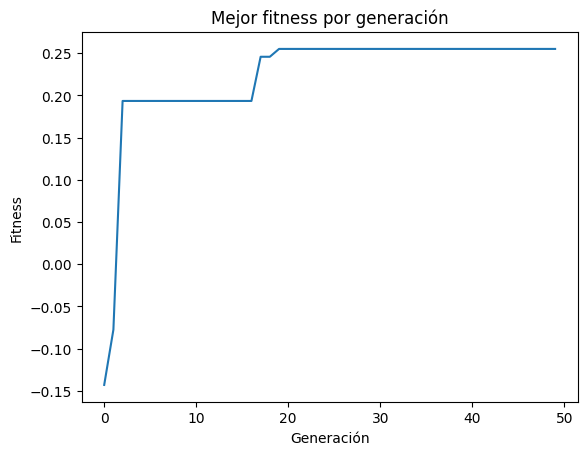

Mejor cromosoma fitness: 0.2550693617353631
Kellogs 0.007701591483854165
Amazon 0.03293836817939662
Exxon 0.07818012357858782
Pfizer 0.04733799785636128
Nestlé 0.04940371827305012
Samsung 0.02805033368891572
Telefónica 0.07581961465518311
L'Oréal 0.020888971820020388
Airbus 0.012586327317561775


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 50
Pc: 0.2
Pm: 0.5
C: 0.6


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.         0.         0.03804469 0.03085865 0.22289116 0.
 0.0436776  0.07137688 0.         0.09460324 0.         0.05676889
 0.         0.         0.06900003 0.         0.2371148  0.
 0.06586169 0.06980237] , Mejor fitness: -0.02063115214239168
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.04205107581533017, 0.004147446639648965, 0.04942571693461592, 0.02104633318912292, 0.06726199878276032, 0.0, 0.03771761097971835, 0.060598133327614365, 0.010419630561514803, 0.07524808713661654, 0.026211822787538266, 0.0586114347161143, 0.00018920046629609548, 0.03271002910489562, 0.012430436362971971, 0.04961069819341597, 0.08120763361394848, 0.0039905435606111496, 0.05457239455442485, 0.02115325011925187]



Generacion 0 completada
Mejor cromosoma: [0.         0.         0.03804469 0.03085865 0.22289116 0.
 0.0436776  0.07137688 0.         0.09460324 0.         0.05676889
 0.         0.         0.06900003 0.         0.2371148  0.


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.17990906 0.         0.         0.         0.09418168 0.
 0.         0.17482312 0.03218135 0.         0.         0.
 0.         0.20106507 0.         0.09633019 0.22150953 0.
 0.         0.        ] , Mejor fitness: 0.027577705499907377
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0507845270596846, 0.0, 0.0, 0.0, 0.032425880313199595, 0.0450544662819677, 0.0, 0.0, 0.01609067256190049, 0.013133799431606552, 0.10288253282357424, 0.015675257689245412, 0.0, 0.04591875636194319, 0.0, 0.007260032311915809, 0.13457013069329551, 0.0, 0.010222089897571139, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.17990906 0.         0.         0.         0.09418168 0.
 0.         0.17482312 0.03218135 0.         0.         0.
 0.         0.20106507 0.         0.09633019 0.22150953 0.
 0.         0.        ] , Mejor fitness: 0.027577705499907377
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.014018685056685354, 0.0, 0.0023278820009327125, 0.0, 0.07646406551633385, 0.019808936594870895, 0.028437050151540633, 0.04657258660289357, 0.0, 0.017635945355369942, 0.02556742916740481, 0.03855263318257883, 0.0, 0.010629260662988948, 0.0, 0.013025029930510768, 0.14756356191434292, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.17990906 0.         0.         0.         0.09418168 0.
 0.         0.17482312 0.03218135 0.         0.         0.
 0.         0.20106507 0.         0.09633019 0.22150953 0.
 0.         0.        ] , Mejor fitness: 0.027577705499907377
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0200008339589381, 0.0, 0.0010822308235529986, 0.0, 0.08071737198927004, 0.0, 0.0, 0.04775618298293964, 0.0, 0.0, 0.01976522181433855, 0.03652032780567084, 0.0, 0.010629260662988948, 0.0, 0.0, 0.0965424956211827, 0.0, 0.0, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.1799090626486055, 0.0, 0.0, 0.0, 0.09418167...  0.027578
1   [0.07280875777779088, 0.0, 0.0, 0.054700980528...  0.007725
2   [0.10837564650805988, 0.0, 0.03618818773037745...  0.003523
3   [0.1410745811900564, 0.0, 0.166504361179293, 0... -0.001120
4   [0.0, 0.01824216905305198, 0.29062929751104155... -0.008060
5  

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.17990906 0.         0.         0.         0.09418168 0.
 0.         0.17482312 0.03218135 0.         0.         0.
 0.         0.20106507 0.         0.09633019 0.22150953 0.
 0.         0.        ] , Mejor fitness: 0.027577705499907377
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.05730019211980049, 0.0, 0.055122113547589696, 0.0, 0.05942111578518136, 0.0, 0.009951156291272563, 0.12359304370374365, 0.0, 0.013669591781753953, 0.05703199796133558, 0.053566889068485446, 0.0, 0.04814587195970913, 0.0, 0.0, 0.1307332283432097, 0.0, 0.061751440844326065, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.17990906 0.         0.         0.         0.09418168 0.
 0.         0.17482312 0.03218135 0.         0.         0.
 0.         0.20106507 0.         0.09633019 0.22150953 0.
 0.         0.        ] , Mejor fitness: 0.027577705499907377
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.05912916730508676, 0.0, 0.054729678220276134, 0.0005412763306128054, 0.07299993103985561, 0.0, 0.0, 0.05722405142225119, 0.010095583134118546, 0.07756718348091879, 0.0, 0.01124736937545463, 0.0, 0.05933632604219527, 0.0, 0.0, 0.18786918389805848, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 49 completada
Mejor cromosoma: [0.0923268  0.         0.01507216 0.         0.10361367 0.
 0.05249429 0.04083741 0.11837288 0.15226358 0.20892348 0.14175322
 0.07973369 0.         0.2771064  0.05882549 0.         0.24925577
 0.         0.15590222] , Mejor fitness: 0.23969324627686037
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.09232679544849932, 0.0, 0.01507216026276494...  0.239693
1   [0.0, 0.05399213090872083, 0.0, 0.0, 0.1605787...  0.059605
2   [0.0, 0.012121662777099603, 0.0, 0.0, 0.0, 0.0...  0.041726
3   [0.0, 0.0, 0.2763351130059647, 0.0, 0.0, 0.005...  0.028153
4   [0.1799090626486055, 0.0, 0.0, 0.0, 0.09418167...  0.027578
5   [0.07280875777779088, 0.0, 0.0, 0.054700980528...  0.007725
6   [0.10837564650805988, 0.0, 0.03618818773037745...  0.003523
7   [0.1410745811900564, 0.0, 0.166504361179293, 0... -0.001120
8   [0.0, 0.018242169

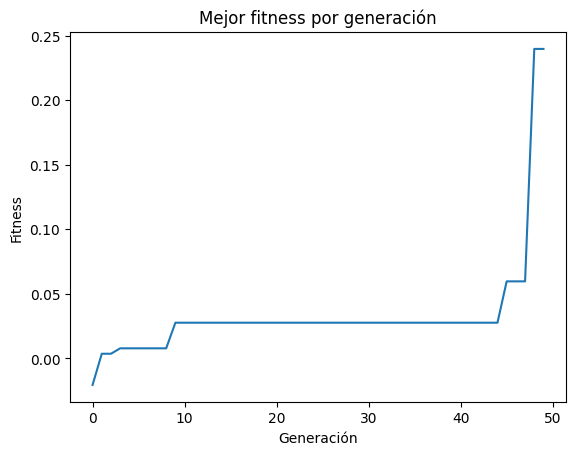

Mejor cromosoma fitness: 0.23969324627686037
IBM 0.09232679544849932
Kellogs 0.015072160262764943
BP 0.10361366726349072
Amazon 0.05249428943090555
Intel 0.0408374120286596
Ford 0.11837288031450233
Exxon 0.15226358186586234
Toyota 0.20892347625172492
Pfizer 0.14175322277231064
Ikea 0.07973368878227238
Nestlé 0.2771063962145474
Samsung 0.05882549343489482
Netflix 0.24925577260184897
Airbus 0.15590221759173645


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 50
Pc: 0.2
Pm: 0.6
C: 0.2


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.         0.01165294 0.01839394 0.         0.17419844 0.
 0.04549348 0.         0.         0.19731315 0.15471171 0.05132823
 0.00975802 0.05885828 0.         0.13150653 0.14678527 0.
 0.         0.        ] , Mejor fitness: -0.07780016329938658
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.025840407422884966, 0.0015836646314233524, 0.018326523277333882, 0.009859873216551653, 0.10775627046247677, 0.025374155782542766, 0.04722909637912327, 0.03869641830814568, 0.0, 0.07494322570259407, 0.005113246157040096, 0.061799185340336946, 0.00048609725991480426, 0.03900960305182588, 0.015350850788196785, 0.05538302231511576, 0.06110334610512699, 0.004444460344362082, 0.037166411408567364, 0.0]



Generacion 0 completada
Mejor cromosoma: [0.         0.01165294 0.01839394 0.         0.17419844 0.
 0.04549348 0.         0.         0.19731315 0.15471171 0.05132823
 0.00975802 0.05885828 0.         0.13150653 0.14678527 0.
 0.        

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [7.50214261e-02 0.00000000e+00 7.29495039e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.49316450e-02 1.40567742e-01
 0.00000000e+00 1.54918849e-04 0.00000000e+00 2.27952020e-01
 0.00000000e+00 0.00000000e+00 1.68103283e-02 0.00000000e+00
 3.12715831e-01 0.00000000e+00 0.00000000e+00 1.18896585e-01] , Mejor fitness: 0.06543031846658544
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0055122448771766155, 0.0, 0.0028410762381079107, 0.0, 0.00854514460662349, 0.02339584450012755, 0.0, 0.03462185546682034, 0.0, 0.008303738617394502, 0.0, 0.04399706982547955, 0.0, 0.0, 0.0, 0.0, 0.12472931964885575, 0.0, 0.03809230660059554, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.         0.         0.         0.         0.03274659 0.05901533
 0.         0.04153507 0.08171655 0.08773731 0.03550041 0.02225262
 0.         0.         0.         0.         0.0057291  0.05135514
 0.05714144 0.08899296] , Mejor fitness: 0.06543031846658544
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.011621621573281227, 0.005798627023674152, 0.0, 0.0249184405621291, 0.0, 0.0, 0.03821016915104328, 0.0, 0.04571524921228963, 0.0033948644284065347, 0.01112630952584488, 0.0, 0.0, 0.0, 0.0, 0.1693511252873694, 0.0, 0.04914366223916624, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.         0.         0.05340682 0.         0.04443567 0.
 0.         0.         0.         0.         0.08846148 0.
 0.01355856 0.04629242 0.         0.03487405 0.         0.07551561
 0.         0.        ] , Mejor fitness: 0.06543031846658544
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.005798627023674152, 0.0, 0.017847529465612275, 0.0, 0.0, 0.0, 0.0, 0.034360591699114984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11836006329408114, 0.0, 0.003468789345914647, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.05340681824895293, 0.0, 0.0444356...  0.065430
1   [0.0, 0.0, 0.0, 0.0, 0.06344743784631217, 0.0,...  0.061927
2   [0.07193267780460844, 0.0, 0.0, 0.0, 0.0, 0.0,...  0.048893
3   [0.0, 0.0, 0.008243500223810441, 0.0, 0.080781...  0.048337
4   [0.09988821280013256, 0.0, 0.0, 0.004181354725...  0.047370
5   [0.0, 0.07318327873433526, 0.0, 0.061

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.00696927 0.         0.         0.00833512 0.02916277 0.
 0.06683768 0.         0.         0.02719116 0.         0.
 0.06455599 0.         0.         0.08138794 0.0780643  0.
 0.         0.        ] , Mejor fitness: 0.06543031846658544
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0028410762381079107, 0.0, 0.023735986962174098, 0.0, 0.0, 0.03562979534888239, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014946957399126368, 0.11836006329408114, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.         0.         0.         0.         0.05811452 0.03865803
 0.         0.07993906 0.         0.09100733 0.07004375 0.
 0.00608892 0.         0.0050041  0.06113516 0.         0.
 0.         0.        ] , Mejor fitness: 0.11961677918852796
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03001809419052349, 0.0, 0.006937370708431112, 0.005316432990705256, 0.010627168947626487, 0.0, 0.0, 0.0, 0.0018041291037754648, 0.08546763879254092, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 49 completada
Mejor cromosoma: [0.         0.         0.         0.04217302 0.0031096  0.
 0.06127679 0.         0.06666293 0.01697397 0.00296982 0.
 0.         0.         0.01287108 0.01053511 0.04972769 0.
 0.08275848 0.05297515] , Mejor fitness: 0.11961677918852796
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.0, 0.042173017823572925, 0.003109...  0.119617
1   [0.0, 0.09946103472151374, 0.02953792129397017...  0.065430
2   [0.0, 0.016594611438671403, 0.0, 0.0, 0.0, 0.0...  0.061927
3   [0.0, 0.04614370382675268, 0.09704845931382484...  0.048893
4   [0.0, 0.0, 0.0, 0.0, 0.060707602689994845, 0.0...  0.048337
5   [0.048065192948424554, 0.0, 0.0, 0.0, 0.030829...  0.047370
6   [0.0, 0.0, 0.0, 0.0, 0.06306790174569517, 0.05...  0.042186
7   [0.0, 0.0, 0.017720785657167993, 0.08232042719...  0.041588
8   [0.01802910393145547, 0.0, 0.0, 0

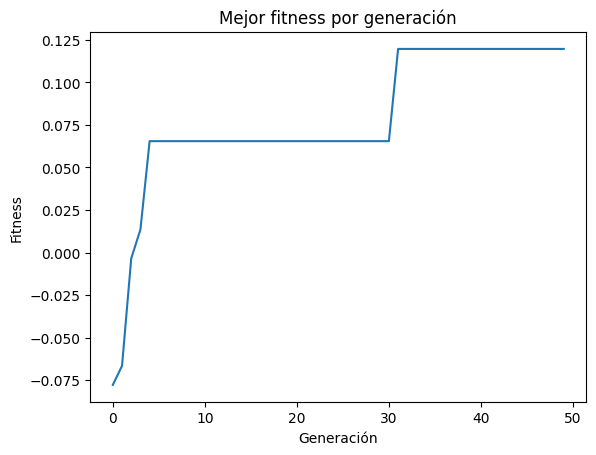

Mejor cromosoma fitness: 0.11961677918852796
Microsoft 0.042173017823572925
BP 0.0031095957854202494
Amazon 0.06127678805937025
Ford 0.06666292689851504
Exxon 0.01697397433064638
Toyota 0.0029698236155881966
Nestlé 0.012871084161558645
Samsung 0.010535111739494951
Telefónica 0.04972769032676055
L'Oréal 0.08275848361119105
Airbus 0.05297515293276305


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 50
Pc: 0.2
Pm: 0.6
C: 0.6


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.01688884 0.         0.21584996 0.02622897 0.05655495 0.06356655
 0.         0.22604031 0.         0.03917665 0.         0.03640391
 0.00898371 0.06364197 0.         0.01925397 0.2274102  0.
 0.         0.        ] , Mejor fitness: 0.031756445030546206
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.009099172033190626, 0.004948905546098647, 0.02761556897568616, 0.01893922709575556, 0.061355476449833274, 0.05983686206671562, 0.00297185755057617, 0.06758063519553395, 0.001159455443685266, 0.05041415084478641, 0.017061625905691102, 0.06937565911551086, 0.005980475310112894, 0.022836643768513507, 0.03510248209605555, 0.070337562427695, 0.062370325051265996, 0.0, 0.013417769072103687, 0.046361788504793486]



Generacion 0 completada
Mejor cromosoma: [0.01688884 0.         0.21584996 0.02622897 0.05655495 0.06356655
 0.         0.22604031 0.         0.03917665 0.         0.03640391
 0.00898371 0.06364197 0.         0.01925397

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.06112189 0.         0.         0.         0.15580241 0.03149284
 0.         0.         0.         0.         0.         0.15783469
 0.         0.         0.02528374 0.         0.33643365 0.
 0.12356231 0.10846848] , Mejor fitness: 0.050983970873185756
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.029714350656071788, 0.0, 0.0, 0.0, 0.05941400788083355, 0.0, 0.0, 0.0, 0.0, 0.05408085401866366, 0.0, 0.04273837643832299, 0.0, 0.016180708915437863, 0.0, 0.0, 0.1492479242957604, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.06112189 0.         0.         0.         0.15580241 0.03149284
 0.         0.         0.         0.         0.         0.15783469
 0.         0.         0.02528374 0.         0.33643365 0.
 0.12356231 0.10846848] , Mejor fitness: 0.050983970873185756
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.008444420743327479, 0.0, 0.0, 0.0, 0.08217778642835123, 0.0, 0.0, 0.14161397714683333, 0.0, 0.0365475655268047, 0.0, 0.011842859005776097, 0.0, 0.0, 0.0, 0.0, 0.10913032347900262, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.06112189 0.         0.         0.         0.15580241 0.03149284
 0.         0.         0.         0.         0.         0.15783469
 0.         0.         0.02528374 0.         0.33643365 0.
 0.12356231 0.10846848] , Mejor fitness: 0.050983970873185756
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.042807363906029294, 0.0, 0.0, 0.0, 0.17482352344615998, 0.0, 0.0, 0.03207952502318726, 0.0, 0.06561314724621839, 0.0, 0.030044811732876577, 0.0, 0.0, 0.0, 0.0, 0.12273266485531964, 0.0, 0.023360824981728822, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0611218850525253, 0.0, 0.0, 0.0, 0.15580240...  0.050984
1   [0.0, 0.0, 0.0, 0.0, 0.29185677130807325, 0.0,...  0.038576
2   [0.05940587820807969, 0.0, 0.0, 0.0, 0.2092040...  0.038468
3   [0.016888841486654958, 0.0, 0.2158499580328871...  0.031756
4   [0.14241629509633572, 0.0, 0.09701750145647403...  0.025943
5

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.05209511 0.         0.         0.         0.24509233 0.03749856
 0.         0.26697575 0.         0.         0.         0.
 0.         0.         0.         0.         0.27061777 0.03703422
 0.         0.09068627] , Mejor fitness: 0.09484143214274607
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.042807363906029294, 0.0, 0.0, 0.0, 0.13180151438265555, 0.0, 0.0, 0.07212287610553608, 0.0, 0.033927893155497435, 0.0, 0.030044811732876577, 0.0, 0.0, 0.0, 0.0, 0.16917874061658966, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.         0.         0.21647299 0.07612172 0.         0.
 0.         0.05671808 0.         0.         0.08155212 0.
 0.22006707 0.17801325 0.20659007 0.         0.         0.
 0.         0.        ] , Mejor fitness: 0.14611915863438973
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.035247760896697775, 0.0, 0.0, 0.0, 0.05127910467091837, 0.0, 0.0, 0.11438972575591405, 0.0, 0.033927893155497435, 0.0, 0.01820195272710048, 0.0, 0.0, 0.0, 0.0, 0.18431228648892597, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 49 completada
Mejor cromosoma: [0.         0.07329285 0.15833487 0.08980358 0.         0.
 0.12809083 0.29990447 0.05825619 0.         0.16567864 0.
 0.12629504 0.         0.         0.25903008 0.         0.
 0.16270461 0.        ] , Mejor fitness: 0.14611915863438973
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0732928462595116, 0.15833487183483455,...  0.146119
1   [0.0, 0.21468572733562863, 0.2794576752598528,...  0.094841
2   [0.10798563245585475, 0.0882940399325461, 0.04...  0.084769
3   [0.0, 0.0, 0.2280128462886754, 0.2924414840006...  0.050984
4   [0.0, 0.17782792107360004, 0.0, 0.046395433536...  0.038576
5   [0.0, 0.2914570455436036, 0.0, 0.0671667740448...  0.038468
6   [0.0, 0.0, 0.0, 0.0, 0.04324757970722962, 0.0,...  0.032563
7   [0.016888841486654958, 0.0, 0.2158499580328871...  0.031756
8   [0.14241629509633572, 0.0, 0.0970

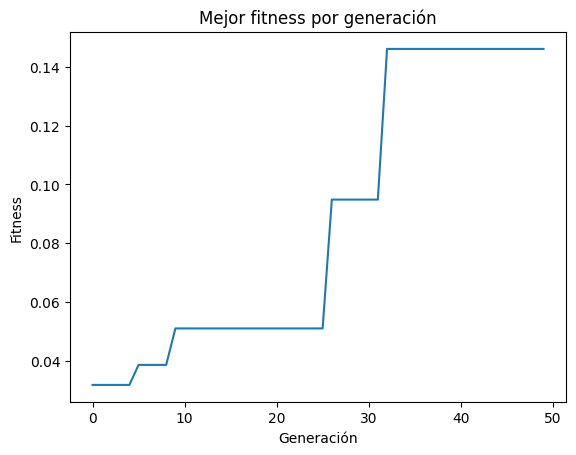

Mejor cromosoma fitness: 0.14611915863438973
Nvidia 0.0732928462595116
Kellogs 0.15833487183483455
Microsoft 0.08980357597026313
Amazon 0.1280908326146825
Intel 0.29990447185355973
Ford 0.05825619057566886
Toyota 0.1656786443905758
Ikea 0.12629503561941965
Samsung 0.2590300845182947
L'Oréal 0.16270461104577574


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 50
Pc: 0.6
Pm: 0.5
C: 0.2


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.116742   0.         0.         0.         0.06254007 0.
 0.11637379 0.1247746  0.         0.07432424 0.03493038 0.0987169
 0.         0.00138627 0.         0.         0.15922246 0.02613815
 0.03817862 0.14667253] , Mejor fitness: -0.08342197877662844
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.056744948855388166, 0.009144579939448642, 0.06994951367370264, 0.05047188535560541, 0.041703660007683295, 0.002087013111392906, 0.04978122858637056, 0.06453860151329649, 0.014644600988749108, 0.05528143167425115, 0.027405524106948173, 0.022135430732251674, 0.012905720606585756, 0.05296081718024339, 0.0043147249382487285, 0.07236658545279821, 0.08901515700546139, 0.017350173305060675, 0.03208038120963369, 0.0]



Generacion 0 completada
Mejor cromosoma: [0.116742   0.         0.         0.         0.06254007 0.
 0.11637379 0.1247746  0.         0.07432424 0.03493038 0.0987169
 0.         0.00138627 0.         0.         0.1592

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [6.42467808e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.60366962e-04 1.20104182e-01
 0.00000000e+00 0.00000000e+00 4.53555023e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.18523200e-02
 6.87218528e-01 0.00000000e+00 0.00000000e+00 7.07623199e-02] , Mejor fitness: 0.30093624801048674
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.002958246351446771, 0.0, 0.0009401443640618405, 0.0, 0.028580611442808292, 0.0358329159435269, 0.017866218421528437, 0.0009781854292246876, 0.0, 0.0, 0.0, 0.033795916918090696, 0.0, 0.0, 0.029387891006806135, 0.09680183929107664, 0.0, 0.0, 0.006367930199964112]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.04598116 0.09235796 0.         0.03510621 0.00852803 0.
 0.         0.01091611 0.08516375 0.         0.         0.
 0.00484693 0.         0.04915406 0.         0.00500228 0.04497536
 0.08022428 0.        ] , Mejor fitness: 0.3065123593901907
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.006754825947057886, 0.021926378477644105, 0.002494546756731131, 0.0, 0.0059856302612341875, 0.012015344939354244, 0.023990601231756805, 0.0, 0.0015358263560290798, 0.0, 0.0, 0.0, 0.02691591893182438, 0.0, 0.03620173736308595, 0.0, 0.0044855551747974955, 0.0, 0.006872599556088344, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.         0.04994706 0.0020297  0.07512873 0.00852803 0.01124431
 0.00578117 0.06626387 0.0525845  0.         0.         0.
 0.         0.         0.04915406 0.         0.01605439 0.04497536
 0.08022428 0.        ] , Mejor fitness: 0.3065123593901907
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.005980998957416417, 0.01632662676606268, 0.013182976512414856, 0.0, 0.0027203072629326977, 0.0, 0.0, 0.0, 0.0, 0.0007770518193267129, 0.0, 0.0, 0.0, 0.015416554649555459, 0.012150562850233682, 0.030750417202430096, 0.0, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.049947056358920806, 0.0020296995875962...  0.306512
1   [0.0, 0.06367180558799128, 0.04355293971397776...  0.300936
2   [0.06255943467941959, 0.0, 0.07181273779484088...  0.281513
3   [0.0, 0.0, 0.031751532377124095, 0.06396454013...  0.239066
4   [0.016386094585304822, 0.0, 0.0, 0.040529

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.0718835  0.01240506 0.0020297  0.         0.0665036  0.
 0.05969128 0.06626387 0.         0.         0.         0.
 0.         0.00494647 0.04915406 0.03595212 0.         0.05872444
 0.08022428 0.07877828] , Mejor fitness: 0.3065123593901907
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0010148497937981227, 0.008758986299054018, 0.019224016974372496, 0.005198053627882071, 0.007779346174883683, 0.010509788561203295, 0.0017664940102197326, 0.02478697358785005, 0.003381907323939204, 0.01066362809566055, 0.0, 0.03578398145468145, 0.0, 0.0, 0.018908032823376244, 0.037642986205026, 0.0, 0.015862662695618413]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.         0.         0.02336957 0.03096486 0.         0.
 0.03895712 0.04577973 0.07561342 0.04534838 0.         0.
 0.         0.00121015 0.         0.03207837 0.         0.
 0.         0.        ] , Mejor fitness: 0.3065123593901907
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.01382131829176686, 0.006821579581365334, 0.0, 0.019358980627454205, 0.0, 0.0, 0.015388211942021248, 0.042195602872867846, 0.025670394915062223, 0.0409728471108882, 0.015981255404453644, 0.003586945688196897, 0.004766762953521242, 0.00021508558099770926, 0.01689498640256206, 0.0, 0.025988130048179105, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 49 completada
Mejor cromosoma: [0.07846899 0.         0.         0.04263357 0.         0.03248261
 0.06379044 0.04505676 0.         0.0212651  0.06345108 0.
 0.07798253 0.         0.06608911 0.09311773 0.03397253 0.06101122
 0.         0.08024984] , Mejor fitness: 0.3065123593901907
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0784689941512514, 0.0, 0.0, 0.0426335744958...  0.306512
1   [0.0, 0.0, 0.0, 0.0743196296870355, 0.05381847...  0.300936
2   [0.04196749635669044, 0.0, 0.0, 0.027210293439...  0.281513
3   [0.0034072681342415703, 0.0500905558339009, 0....  0.239066
4   [0.0, 0.0, 0.0, 0.07269093314342297, 0.0, 0.09...  0.225398
5   [0.08856857004038665, 0.0016341472313104568, 0...  0.214104
6   [0.05254979077363456, 0.012310090276274012, 0....  0.204888
7   [0.0, 0.0, 0.04323150877097111, 0.049131838654...  0.204523
8   [0.042232374503292

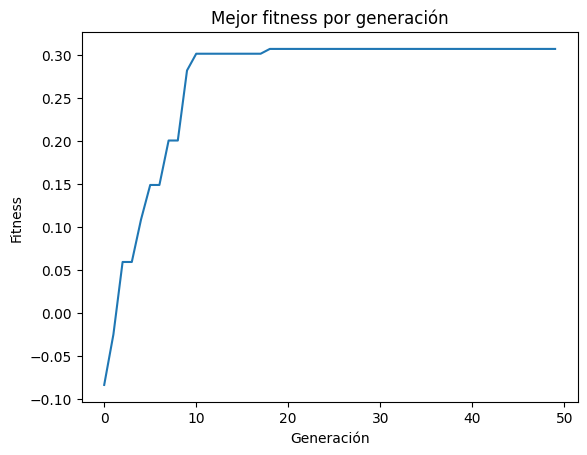

Mejor cromosoma fitness: 0.3065123593901907
IBM 0.0784689941512514
Microsoft 0.042633574495884674
UPS 0.03248261297817139
Amazon 0.06379044341368847
Intel 0.045056762697969814
Exxon 0.021265097992906525
Toyota 0.06345107516637385
Ikea 0.0779825326389297
Nestlé 0.06608911458715423
Samsung 0.09311772739214469
Telefónica 0.03397252757367406
Netflix 0.061011224579592405
Airbus 0.08024983763816534


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 50
Pc: 0.6
Pm: 0.5
C: 0.6


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.
 0.         0.18428854 0.         0.2109658  0.14981928 0.03281257
 0.         0.         0.16076436 0.         0.26134945 0.
 0.         0.        ] , Mejor fitness: -0.04557281982014129
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.059250386440591385, 0.0051154773083414064, 0.027298434388506508, 0.008858788430567244, 0.03664790057546881, 0.02098794339551492, 0.030429046320045124, 0.041710921845949496, 0.018670430585717487, 0.08280771043184312, 0.022698237199432043, 0.036513959359228625, 0.028352629738842422, 0.005988224613929974, 0.0068428025648100445, 0.02882788190629479, 0.07810234575978599, 0.00796705303958417, 0.05599428094973387, 0.03294754270270047]



Generacion 0 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.
 0.         0.18428854 0.         0.2109658  0.14981928 0.03281257
 0.         0.         0.16076436 0.  

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.57657659 0.
 0.42342341 0.        ] , Mejor fitness: 0.20543853152472713
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.025784945825978622, 0.0, 0.004778840526749195, 0.06167846513414339, 0.0, 0.011067923741912587, 0.0, 0.0040738946354570895, 0.0, 0.06312097884618065, 0.0, 0.0, 0.1785098686978894, 0.0, 0.06138771315716154, 0.00029862849821852275]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.57657659 0.
 0.42342341 0.        ] , Mejor fitness: 0.20543853152472713
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.022156154865608763, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0040738946354570895, 0.0, 0.008534722631730173, 0.0, 0.0, 0.22934114437827763, 0.0, 0.08806492517223741, 0.00029862849821852275]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.12332567 0.11780854 0.15097713 0.         0.19541585 0.
 0.         0.12128849 0.         0.12388951 0.18742645 0.04049058
 0.20578943 0.         0.18469086 0.         0.         0.
 0.28424133 0.        ] , Mejor fitness: 0.20543853152472713
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.03997750966646991, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029921534698655786, 0.0, 0.010770307459708035, 0.0, 0.0, 0.2280340877312584, 0.0, 0.0, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.12332566638602166, 0.11780853597484536, 0.1...  0.205439
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0043963025701...  0.118983
2   [0.0, 0.0, 0.0, 0.08956371825338871, 0.0, 0.0,...  0.073828
3   [0.2280422667076334, 0.0, 0.0, 0.0, 0.17147634...  0.052024
4   [0.0, 0.0, 0.0, 0.0, 0.17020167737236092, 0.0,...  0.049777
5   [0.02687975490661217, 0.0, 0.0, 0.0, 0.2647491...  0.035

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.         0.         0.23726675 0.         0.1927542  0.00451616
 0.00192132 0.21049227 0.13178444 0.09947279 0.13236822 0.
 0.28031969 0.         0.26831709 0.15939753 0.19613705 0.13880226
 0.04188637 0.04312402] , Mejor fitness: 0.20543853152472713
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.07219898448421282, 0.0, 0.0, 0.07423300377195648, 0.0, 0.0, 0.0, 0.008523309912225741, 0.0, 0.03902354664833338, 0.0, 0.005307691714829344, 0.23313745068244712, 0.0, 0.020943186538795188, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.10995889 0.04264316 0.         0.19003671 0.12889033 0.04614504
 0.         0.06811292 0.13397365 0.24505159 0.13744058 0.26627557
 0.03373564 0.         0.10316094 0.28199471 0.04776223 0.
 0.12544873 0.        ] , Mejor fitness: 0.20543853152472713
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.09966965075352453, 0.0, 0.0, 0.10616243996747349, 0.0, 0.004091853756491092, 0.00774595477408083, 0.0040738946354570895, 0.0, 0.01266845180082515, 0.0, 0.01228585653536668, 0.18677780528826105, 0.0, 0.08049795356005494, 0.008405013787436336]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 49 completada
Mejor cromosoma: [0.         0.         0.08494803 0.17318705 0.06980219 0.01391337
 0.         0.24742504 0.12890619 0.19745485 0.07164157 0.
 0.10094616 0.         0.09000571 0.25593989 0.25307015 0.
 0.         0.        ] , Mejor fitness: 0.20543853152472713
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.08494803469192376, 0.173187047202...  0.205439
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.164...  0.118983
2   [0.24395436096067255, 0.10137340777173422, 0.0...  0.094607
3   [0.0, 0.0, 0.0, 0.2694099171823131, 0.27906923...  0.086437
4   [0.2804764537122089, 0.0, 0.14603209341164095,...  0.082751
5   [0.0, 0.16096276979992727, 0.12171651376101641...  0.073828
6   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2223653136032...  0.052024
7   [0.0, 0.18890784737957586, 0.0, 0.0, 0.0296009...  0.049777
8   [0.0, 0.0, 0.0, 0.0, 0.0,

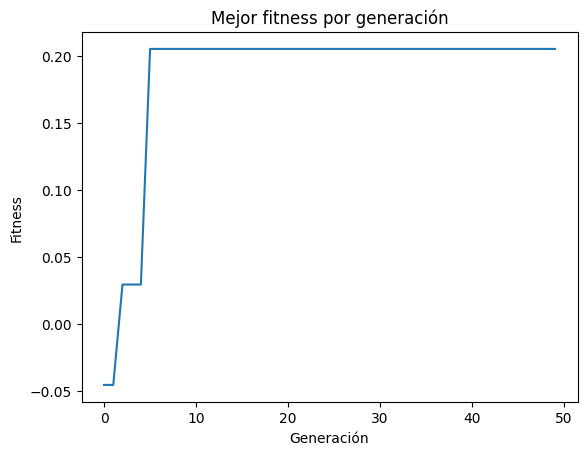

Mejor cromosoma fitness: 0.20543853152472713
Kellogs 0.08494803469192376
Microsoft 0.17318704720217518
BP 0.06980218538812284
UPS 0.013913367623551286
Intel 0.24742504497279125
Ford 0.1289061868274863
Exxon 0.1974548499291711
Toyota 0.0716415664437668
Ikea 0.100946164983452
Nestlé 0.09000571112084785
Samsung 0.25593988655579347
Telefónica 0.25307014719542387


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 50
Pc: 0.6
Pm: 0.6
C: 0.2


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.06064499 0.10874902 0.16256609 0.         0.12350963 0.09684006
 0.00403794 0.04054918 0.01540653 0.         0.         0.
 0.         0.01790401 0.         0.01654946 0.17477066 0.
 0.14550769 0.03296474] , Mejor fitness: -0.1701668783709646
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.024943213138868707, 0.0, 0.08581602936315183, 0.003884761970262452, 0.07158398926911436, 0.02035754539681777, 0.05556700602849472, 0.06836530316701228, 0.021502923302464377, 0.03692915991517187, 0.003917604464315123, 0.08051688857650574, 0.0026481581691984806, 0.03569879585618142, 0.0, 0.07495471327457993, 0.06706904871753289, 0.023437118025137392, 0.08956319572304225, 0.018754414010209018]



Generacion 0 completada
Mejor cromosoma: [0.06064499 0.10874902 0.16256609 0.         0.12350963 0.09684006
 0.00403794 0.04054918 0.01540653 0.         0.         0.
 0.         0.01790401 0.         0.01654946 0.17477066 0.
 0.14550769 0.0329

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.00000000e+00 0.00000000e+00 1.31674189e-01 0.00000000e+00
 1.16956632e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.90672272e-03 0.00000000e+00 1.13754184e-01
 0.00000000e+00 0.00000000e+00 3.88103990e-02 0.00000000e+00
 5.57202524e-01 0.00000000e+00 2.11324117e-04 3.34840246e-02] , Mejor fitness: 0.18674714580434182
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.012791289100813863, 0.0, 0.043373275215189855, 0.0, 0.0, 0.0, 0.0, 0.02235620738165737, 0.002163690282458524, 0.0, 0.0, 0.01442108127063161, 0.0, 0.0, 0.0857679551186235, 0.0, 0.015043262655685914, 0.006870762441459278]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.00000000e+00 0.00000000e+00 1.31674189e-01 0.00000000e+00
 1.16956632e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.90672272e-03 0.00000000e+00 1.13754184e-01
 0.00000000e+00 0.00000000e+00 3.88103990e-02 0.00000000e+00
 5.57202524e-01 0.00000000e+00 2.11324117e-04 3.34840246e-02] , Mejor fitness: 0.18674714580434182
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.043373275215189855, 0.0, 0.0, 0.03459582534307222, 0.0, 0.043465078119981335, 0.002163690282458524, 0.004158498925127075, 0.0, 0.006726304380399829, 0.0, 0.0, 0.20793666369637345, 0.0, 0.0, 0.015584761643875789]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.
 0.         0.047534   0.07899724 0.         0.04612414 0.
 0.00566607 0.         0.06793149 0.         0.         0.
 0.         0.0967828 ] , Mejor fitness: 0.18674714580434182
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.043373275215189855, 0.0, 0.0, 0.09728640673401334, 0.0, 0.020887884031389962, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25491643149287124, 0.0, 0.0, 0.015584761643875789]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04753399...  0.186747
1   [0.0, 0.0, 0.14470584961977717, 0.0, 0.0, 0.00...  0.154791
2   [0.0, 0.0, 0.0, 0.1616999551312006, 0.0, 0.0, ...  0.131220
3   [0.0, 0.0, 0.0, 0.0, 0.3168134612610908, 0.0, ...  0.067491
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.06977918397409606,...  0.050057
5   [0.1646594915990361, 0.0, 0.00666376057110902,

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.         0.05830234 0.0144413  0.         0.         0.00728922
 0.         0.         0.         0.         0.         0.02642646
 0.         0.         0.00268069 0.         0.         0.
 0.08233351 0.06093507] , Mejor fitness: 0.296430594377383
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.014721452890696695, 0.021605879415435382, 0.0, 0.0, 0.038654338967760146, 0.0, 0.0, 0.023216781674419363, 0.0, 0.0, 0.0031359139525103316, 0.003245933847832472, 0.058648235574702064, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.
 0.02125934 0.04605802 0.         0.         0.         0.
 0.05028423 0.         0.         0.         0.         0.
 0.         0.        ] , Mejor fitness: 0.296430594377383
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.042122778675424466, 0.039603809651707816, 0.006442027657130878, 0.0, 0.0, 0.0, 0.0, 0.007894132796706666, 0.008425001401567178, 0.006145548139621305, 0.022698668985428373, 0.031747980206235815, 0.019473767040755565, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004389631565499941, 0.029646776596571334]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 49 completada
Mejor cromosoma: [0.09937632 0.         0.0775715  0.         0.         0.0683262
 0.         0.         0.05754336 0.         0.09141318 0.08824636
 0.         0.07820573 0.08625685 0.03666127 0.         0.
 0.07636525 0.        ] , Mejor fitness: 0.296430594377383
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.09937632057827231, 0.0, 0.07757150350172226...  0.296431
1   [0.0, 0.008890310112641497, 0.0, 0.0, 0.081141...  0.283851
2   [0.023552847065154193, 0.0, 0.0, 0.02542394676...  0.279425
3   [0.03695794003710995, 0.0, 0.0, 0.0, 0.0, 0.0,...  0.246235
4   [0.09974157437111714, 0.09901680096963633, 0.0...  0.226336
5   [0.0, 0.04064154517117827, 0.02292828156909505...  0.198094
6   [0.0, 0.0, 0.014039579538750568, 0.0, 0.0, 0.0...  0.195154
7   [0.0, 0.07789499472652342, 0.07619567704711368...  0.186747
8   [0.02503155497268286

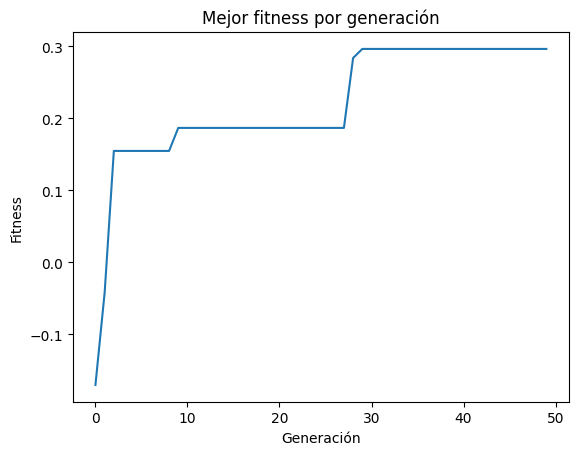

Mejor cromosoma fitness: 0.296430594377383
IBM 0.09937632057827231
Kellogs 0.07757150350172226
UPS 0.06832619725001075
Ford 0.057543362793292196
Toyota 0.09141317739199212
Pfizer 0.08824636053955033
Bayer 0.0782057306723776
Nestlé 0.08625684970113141
Samsung 0.036661268037259824
L'Oréal 0.07636524997218719


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 50
Pc: 0.6
Pm: 0.6
C: 0.6


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.05891591 0.         0.         0.         0.13016153 0.10104864
 0.         0.         0.         0.         0.03415633 0.11968017
 0.         0.         0.         0.         0.3758821  0.07582832
 0.104327   0.        ] , Mejor fitness: 0.003582920077937279
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.03600396290242831, 0.0, 0.024793253717992424, 0.0, 0.07943588109466806, 0.028490238558405264, 0.02493602048612498, 0.07644191721146873, 0.004176986001896944, 0.06497383468490531, 0.01629794391444838, 0.0499199060153298, 0.00199038909029669, 0.03192264593705754, 0.021609844679256085, 0.004057726044581146, 0.045444564400076326, 0.0, 0.058262579959511625, 0.016918139034953962]



Generacion 0 completada
Mejor cromosoma: [0.05891591 0.         0.         0.         0.13016153 0.10104864
 0.         0.         0.         0.         0.03415633 0.11968017
 0.         0.         0.         0.         0.3758821  0.07582832
 0

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.         0.         0.         0.         0.04214892 0.
 0.         0.         0.01063188 0.         0.10877722 0.1632367
 0.0229468  0.         0.         0.2443357  0.40792278 0.
 0.         0.        ] , Mejor fitness: 0.07697845763787763
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.03460322411441258, 0.0023147710446321467, 0.0, 0.0, 0.11081476305743568, 0.014808486574537292, 0.0, 0.0, 0.0, 0.009349514025267945, 0.0, 0.1100946831640035, 0.0, 0.0, 0.0, 0.0, 0.1329346717673329, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.         0.         0.         0.         0.04214892 0.
 0.         0.         0.01063188 0.         0.10877722 0.1632367
 0.0229468  0.         0.         0.2443357  0.40792278 0.
 0.         0.        ] , Mejor fitness: 0.07697845763787763
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.014769625204662117, 0.0, 0.0, 0.0, 0.0, 0.004394688607034879, 0.0, 0.059397783510323945, 0.0, 0.0, 0.028857923440457532, 0.08527888295131207, 0.0, 0.0428105677248571, 0.0, 0.11331304234829137, 0.11153766396941733, 0.0, 0.028023113457586027, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.         0.         0.06688505 0.         0.         0.
 0.         0.         0.         0.3912094  0.         0.
 0.         0.06975471 0.         0.07460682 0.39754402 0.
 0.         0.        ] , Mejor fitness: 0.1419114594196288
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.059397783510323945, 0.0, 0.11223626449236945, 0.03181712381091963, 0.03598787885196189, 0.0, 0.01788479478067198, 0.0, 0.0037616839258691544, 0.2043044113933955, 0.0, 0.030447535716943103, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.06688504687623163, 0.0, 0.0, 0.0,...  0.141911
1   [0.0, 0.0, 0.0, 0.0, 0.04214892497661964, 0.0,...  0.076978
2   [0.05891591095775587, 0.0, 0.0, 0.0, 0.1301615...  0.003583
3   [0.029539250409324234, 0.0, 0.0, 0.0, 0.088886... -0.002104
4   [0.24717221445720738, 0.0, 0.0, 0.0, 0.0958964... -0.010306
5  

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.         0.         0.06688505 0.         0.         0.
 0.         0.         0.         0.3912094  0.         0.
 0.         0.06975471 0.         0.07460682 0.39754402 0.
 0.         0.        ] , Mejor fitness: 0.1419114594196288
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.0923915964187168, 0.0, 0.0, 0.059397783510323945, 0.0, 0.0, 0.01850839444831809, 0.025438795553039555, 0.0, 0.00038926798430538833, 0.0, 0.0, 0.2129737133958562, 0.0, 0.01616355545638035, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.20704215 0.25164565 0.         0.         0.07168865 0.29943796
 0.23152991 0.03601686 0.         0.         0.         0.
 0.24847964 0.         0.00564758 0.03552838 0.         0.15820675
 0.1896557  0.12085358] , Mejor fitness: 0.26727185164227296
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.03926040112793164, 0.0, 0.0, 0.0, 8.24492340656513e-05, 0.0, 0.0, 0.12342111632818531, 0.0, 0.0, 0.011970159038345638, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2159105811882644, 0.0, 0.029058910523191303, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 49 completada
Mejor cromosoma: [0.         0.         0.21118828 0.06762943 0.26767599 0.
 0.18348003 0.         0.         0.         0.         0.19461085
 0.10611767 0.18051182 0.06319909 0.         0.18332703 0.
 0.         0.00840072] , Mejor fitness: 0.26727185164227296
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.21118827956405295, 0.067629425094...  0.267272
1   [0.0, 0.08369308900452695, 0.2835396896810372,...  0.141911
2   [0.0, 0.0, 0.0, 0.2449524965028318, 0.06575581...  0.140199
3   [0.0, 0.0, 0.05219234924481353, 0.151571217218...  0.076978
4   [0.22455156156513698, 0.0, 0.09485030763470345...  0.062534
5   [0.0, 0.0, 0.0, 0.0, 0.13846137647656756, 0.13...  0.060405
6   [0.0, 0.0, 0.01937379835848774, 0.0, 0.0, 0.11...  0.049600
7   [0.0, 0.0, 0.0, 0.0, 0.13593835603650636, 0.0,...  0.016444
8   [0.08032815946680179, 0.0

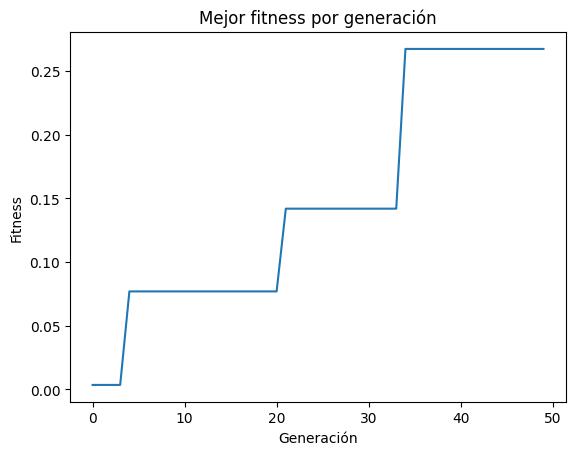

Mejor cromosoma fitness: 0.26727185164227296
Kellogs 0.21118827956405295
Microsoft 0.06762942509447689
BP 0.2676759882929904
Amazon 0.18348003299335702
Pfizer 0.19461085018952312
Ikea 0.10611767371497628
Bayer 0.18051182346768707
Nestlé 0.06319909039616405
Telefónica 0.18332702741570808
Airbus 0.008400715930249224


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 100
Pc: 0.2
Pm: 0.5
C: 0.2


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.11572382 0.         0.         0.         0.24157113 0.0369021
 0.13082931 0.         0.         0.08344909 0.         0.22865359
 0.         0.05720424 0.02744046 0.04568131 0.         0.
 0.         0.03254494] , Mejor fitness: -0.15867669430602713
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.06429837905326957, 0.0, 0.026859269715350784, 0.01529869655295042, 0.06944427133863378, 0.039350868425373664, 0.03277842167095246, 0.050005151347845445, 0.002507779576346081, 0.028037254456371657, 0.010099965618122955, 0.07928241355170437, 0.03943271385552824, 0.033729142955367074, 0.0, 0.02949162168385068, 0.07426229221093891, 0.0016162367078052782, 0.013660755248193969, 0.06967991378964117]



Generacion 0 completada
Mejor cromosoma: [0.11572382 0.         0.         0.         0.24157113 0.0369021
 0.13082931 0.         0.         0.08344909 0.         0.22865359
 0.         0.05720424 0.02744046 0.04568131 0.         0.
 

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.15524052 0.         0.         0.         0.2848782  0.
 0.04837345 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.43848327 0.
 0.07302457 0.        ] , Mejor fitness: 0.13896091012940764
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.02194516223536092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01788338854399445, 0.0, 0.0, 0.04178660667658725, 0.0, 0.0, 0.05155365506064001, 0.0, 0.013758712457635899, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.         0.         0.0446517  0.0504277  0.09882694 0.01199922
 0.         0.00577975 0.         0.06277108 0.03074743 0.02526246
 0.03263953 0.03941031 0.08906902 0.01432519 0.03769898 0.09981282
 0.05273999 0.01146397] , Mejor fitness: 0.13896091012940764
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.004443916667452716, 0.0, 0.0, 0.0, 0.0, 0.11474878437382474, 0.0, 0.029300617111196244, 0.03636067540918173, 0.011984844690583835, 0.0, 0.03283154952793495, 0.0, 0.0, 0.08265261743857585, 0.0, 0.0, 0.0057319839608673375]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.
 0.         0.8540682  0.         0.02075118 0.0578288  0.
 0.         0.         0.         0.         0.04251878 0.02483304
 0.         0.        ] , Mejor fitness: 0.1566151143576462
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1751492733117115, 0.0, 0.034570559660469985, 0.03762502037013013, 0.0, 0.0, 0.006185572078787059, 0.0, 0.0, 0.049451611246873424, 0.0, 0.0, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.85406820...  0.156615
1   [0.0, 0.007614886661369469, 0.0, 0.08013248550...  0.138961
2   [0.0, 0.0, 0.07801452783755501, 0.077974497888...  0.108936
3   [0.0, 0.0, 0.07978982139357338, 0.0, 0.0, 0.0,...  0.071970
4   [0.0, 0.08587703920036412, 0.0, 0.053810650820...  0.063126
5   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.02508069 0.         0.08462888 0.00017244 0.01555703 0.
 0.         0.         0.04454628 0.03325011 0.         0.00865964
 0.0853201  0.         0.02396831 0.         0.04922028 0.03856883
 0.07301459 0.        ] , Mejor fitness: 0.17798111652233753
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0056830904446486755, 0.0015071587145062072, 0.0, 0.0, 0.0, 0.026325421147081043, 0.0, 0.04798352498457295, 0.0, 0.0, 0.016220795641026565, 0.0, 0.03086295104751018, 0.0, 0.0, 0.00989754169628215, 0.05280236145610826, 0.0024872953343381687, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.05604485 0.         0.         0.02686297 0.08224181 0.01425534
 0.03336063 0.        ] , Mejor fitness: 0.19002140147961682
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.025670473616197023, 0.0, 0.0, 0.0, 0.019550217280109774, 0.0017704849259877033, 0.008435557212778656, 0.0, 0.0, 0.0, 0.0038482050878864364, 0.0, 0.0, 0.01160275070420963, 0.02660781394643609, 0.02219101237009992, 0.0, 0.0020109710942592843, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 50 completada
Mejor cromosoma: [0.09994365 0.         0.         0.         0.         0.03397826
 0.04994273 0.04941583 0.07176092 0.         0.01182915 0.07281073
 0.09245051 0.04195233 0.09763908 0.         0.         0.06430606
 0.08494587 0.01320769] , Mejor fitness: 0.19002140147961682
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.01078098106400276, 0.02377523305941577, 0.0018873442139493825, 0.0068055514030565985, 0.0, 0.0, 0.005290311525716474, 0.0, 0.0, 0.005111627057107604, 0.0, 0.017778937231910853, 0.016403914254457908, 0.001617482815571114, 0.003778886535534698, 0.0, 0.0, 0.0, 0.0]



Generacion 50 completada
Mejor cromosoma: [0.09994365 0.         0.         0.         0.         0.03397826
 0.04994273 0.04941583 0.07176092 0.         0.01182915 0.07281073
 0.09245051 0.04195233 0.09763908 0.         0.         0.06430606
 0.08494587 0.01320769] , Mejor fitness: 0.19002140147961682
Porcentaje de aparición del mejor cromosoma: 1.0


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 60 completada
Mejor cromosoma: [0.         0.03409017 0.         0.         0.04873535 0.0726534
 0.09162315 0.         0.07272731 0.00896016 0.07442034 0.
 0.         0.09671147 0.0049841  0.         0.         0.04983836
 0.03631631 0.        ] , Mejor fitness: 0.20812246839132423
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.004088846692019488, 0.0004230589743759672, 0.0, 0.0, 0.045622634124090636, 0.0, 0.035818837430307726, 0.0, 0.041682991214772355, 0.009369626349907945, 0.004750378838707304, 0.0, 0.027001306860170184, 0.0, 0.0, 0.0, 0.0, 0.018080157189607905]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 70 completada
Mejor cromosoma: [0.05279883 0.00365935 0.         0.06788466 0.         0.0138584
 0.02581751 0.08758655 0.02170171 0.         0.         0.
 0.04644273 0.         0.         0.04288964 0.         0.07258064
 0.         0.08978373] , Mejor fitness: 0.20812246839132423
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.01857142681010381, 0.0, 0.0, 0.0015916204874665163, 0.050647768053749743, 0.004076968318432095, 0.001654189030875386, 0.0014859198079043346, 0.0, 0.0, 0.006114938573480733, 0.005058652225573035, 0.002045650219591311, 0.0020339118452818994, 0.0, 0.0, 0.0, 0.028578117836747664, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 75 completada
Mejor cromosoma: [0.03741328 0.03530068 0.02126896 0.         0.         0.
 0.09671293 0.02108605 0.         0.         0.0157039  0.04833758
 0.0698704  0.         0.06599968 0.         0.08346015 0.
 0.         0.09922785] , Mejor fitness: 0.20812246839132423
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.03311515750837839, 0.03455992894934597, 0.0, 0.0, 0.0027365447195785266, 0.049854131792306675, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016237546519998813, 0.0, 0.014839456181889088, 0.01524234348341712, 0.009027961249590766, 0.008739756993233339, 0.006233027388481549, 0.022096901238521528, 0.028382342523590898]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.03741328002289257, 0.03530067640750634, 0.0...  0.208122
1   [0.03807226490667748, 0.0956201931151193, 0.0,...  0.190021
2   [0.048704494111421616, 0.0, 0.0153058298342916...  0.177981
3   [0.036591171604058316, 0.05884737314317415, 0..

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 80 completada
Mejor cromosoma: [0.12326914 0.         0.         0.         0.0903538  0.08747358
 0.         0.19175413 0.         0.         0.         0.
 0.         0.         0.         0.         0.50714934 0.
 0.         0.        ] , Mejor fitness: 0.2201248354763831
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.03808069825417616, 0.015056924539982919, 0.014997737189638961, 0.0006213806197745364, 0.0041311738496745964, 0.0, 0.0, 0.03807824103105885, 0.0, 0.011609025851036691, 0.0, 0.00685542783552009, 0.0024126923271778344, 0.0, 0.0, 0.02516058071032619, 0.0, 0.010514735355048445, 0.004772593185687679, 0.020915268293015245]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 90 completada
Mejor cromosoma: [0.04717914 0.09523939 0.         0.0241345  0.         0.
 0.01404352 0.         0.00109218 0.02655825 0.         0.08704889
 0.08454764 0.09071414 0.         0.         0.09487711 0.068917
 0.08245019 0.        ] , Mejor fitness: 0.2201248354763831
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.015855716213836003, 0.0013141480109691408, 0.021847021772910882, 0.003197836889203798, 0.012408018237228823, 0.0, 0.03477719774487286, 0.0, 0.009970057786783506, 0.007479798011393391, 0.0, 0.0415389059594299, 0.03374765658732827, 0.0688111024660023, 0.0, 0.007611596263305032, 0.0, 0.0, 0.03227969533679731, 0.011370387760684398]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 99 completada
Mejor cromosoma: [0.         0.07769549 0.         0.0719615  0.         0.05166733
 0.07787986 0.0063043  0.04241569 0.         0.         0.06912483
 0.         0.09639322 0.         0.         0.04684878 0.03308428
 0.         0.        ] , Mejor fitness: 0.2201248354763831
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.07769549310233231, 0.0, 0.071961497747...  0.220125
1   [0.0, 0.0, 0.0018920477036119766, 0.0166179956...  0.208122
2   [0.03970041196025725, 0.015780931530662845, 0....  0.190021
3   [0.0, 0.07800487692285951, 0.0, 0.0, 0.0, 0.0,...  0.177981
4   [0.0, 0.07625837745361962, 0.03130688368665746...  0.166045
5   [0.012783251413881681, 0.05249714131918559, 0....  0.165051
6   [0.09184670959094626, 0.06438982694820734, 0.0...  0.156615
7   [0.005905311844299899, 0.0, 0.0669495957960689...  0.150712
8   [0.0, 0.0,

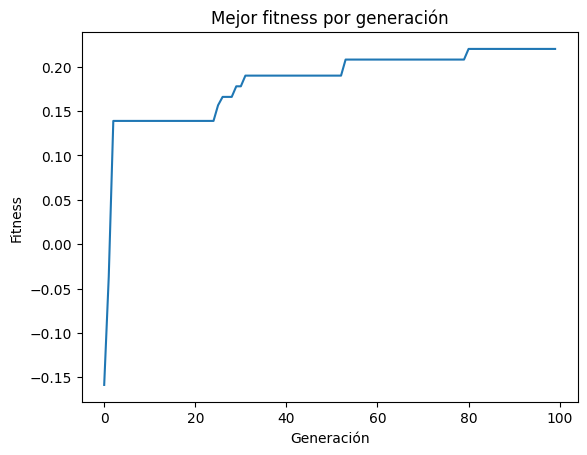

Mejor cromosoma fitness: 0.2201248354763831
Nvidia 0.07769549310233231
Microsoft 0.07196149774707652
UPS 0.05166732507202623
Amazon 0.07787986019225004
Intel 0.006304301016347225
Ford 0.04241568790694814
Pfizer 0.06912482916475937
Bayer 0.09639321689549135
Telefónica 0.046848775414858324
Netflix 0.033084277334488155


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 100
Pc: 0.2
Pm: 0.5
C: 0.6


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.09353524 0.03815674 0.10107783 0.         0.01132174 0.02921468
 0.04212815 0.058325   0.         0.09590651 0.         0.11829834
 0.         0.00295732 0.         0.15975523 0.10996045 0.
 0.01494555 0.12441723] , Mejor fitness: -0.11010534113449381
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.042447379970466825, 0.0, 0.04820702870028981, 0.010351366277244044, 0.05380489290653347, 0.04470776310325687, 0.006706550978301095, 0.09227906837995198, 0.0, 0.0630133410292614, 0.030858232622874546, 0.0398876117951528, 0.03247959557312825, 0.021892099552049467, 0.016088484672250155, 0.07600432194687487, 0.10247429950226619, 0.055229587381747006, 0.0, 0.0]



Generacion 0 completada
Mejor cromosoma: [0.09353524 0.03815674 0.10107783 0.         0.01132174 0.02921468
 0.04212815 0.058325   0.         0.09590651 0.         0.11829834
 0.         0.00295732 0.         0.15975523 0.10996045 0.
 0.01494555 0.12441723] , Mejor fitn

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.         0.         0.10912603 0.         0.13755489 0.
 0.         0.04743229 0.         0.16766416 0.         0.
 0.         0.         0.         0.14585557 0.33582813 0.02311805
 0.         0.03342087] , Mejor fitness: 0.10008251302973131
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.011468351922466011, 0.0, 0.019358769777405645, 0.0, 0.054435927299519155, 0.0, 0.0, 0.062433028266483226, 0.0, 0.05637929285598027, 0.051025932535440466, 0.0, 0.0, 0.0, 0.0, 0.10897587433418249, 0.13374183701508296, 0.006760420731404708, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.         0.         0.10912603 0.         0.13755489 0.
 0.         0.04743229 0.         0.16766416 0.         0.
 0.         0.         0.         0.14585557 0.33582813 0.02311805
 0.         0.03342087] , Mejor fitness: 0.10008251302973131
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.11128900649998137, 0.0, 0.021267298604948588, 0.0017623002292069796, 0.07724336183062269, 0.0, 0.0, 0.05336474627197263, 0.0, 0.0, 0.01634246340201402, 0.0, 0.0, 0.03287078912417821, 0.0, 0.09987848962526512, 0.13374183701508296, 0.0, 0.0, 0.009880758354076513]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.         0.         0.10912603 0.         0.13755489 0.
 0.         0.04743229 0.         0.16766416 0.         0.
 0.         0.         0.         0.14585557 0.33582813 0.02311805
 0.         0.03342087] , Mejor fitness: 0.10008251302973131
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.04821747136655406, 0.0, 0.04806922868587625, 0.0, 0.0, 0.0, 0.0, 0.07147656667113719, 0.0, 0.0, 0.0, 0.03728075315424013, 0.0, 0.03306936610789156, 0.0, 0.07555628484375895, 0.17726879611697832, 0.0, 0.009343299879628324, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.10912602935950112, 0.0, 0.1375548...  0.100083
1   [0.01137875784347748, 0.0, 0.0, 0.003524600458...  0.028881
2   [0.16571001293555587, 0.0, 0.0, 0.0, 0.1076982...  0.013759
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.10240890982529703,...  0.013683
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.06869554513045585,...  0.013

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.1284718  0.14636636 0.         0.24146257 0.         0.19038694
 0.09416948 0.         0.22759751 0.08147028 0.08299996 0.
 0.04813844 0.08596372 0.         0.         0.         0.
 0.22649957 0.01749267] , Mejor fitness: 0.1350460664812414
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.043699126911200925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1808533836073235, 0.0, 0.030602668997009842, 0.0, 0.0, 0.0, 0.04090540216296651, 0.0, 0.0, 0.17726879611697832, 0.0, 0.0, 0.0030938708530738016]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.08590878 0.         0.34945115 0.         0.         0.
 0.         0.08634275 0.         0.         0.         0.02946795
 0.         0.         0.         0.         0.44882936 0.
 0.         0.        ] , Mejor fitness: 0.15120424713647262
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.014151614372539058, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17879996059268452, 0.0, 0.0, 0.0, 0.04013698560115278, 0.0, 0.01364893130498461, 0.0, 0.0, 0.23004038409811955, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 50 completada
Mejor cromosoma: [0.         0.04038247 0.1887526  0.         0.         0.14354729
 0.04150247 0.         0.13728139 0.         0.23876156 0.19197212
 0.         0.2365403  0.20931249 0.         0.22319961 0.
 0.08385666 0.22409025] , Mejor fitness: 0.15120424713647262
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0073600323665270724, 0.0, 0.0, 0.0, 0.0, 0.07226720449812284, 0.0, 0.0, 0.005968671067005491, 0.056141118441150176, 0.0, 0.02035997040789298, 0.034364137382445606, 0.04690369027069421, 0.2184939321612957, 0.0, 0.023465041285669546, 0.0]



Generacion 50 completada
Mejor cromosoma: [0.         0.04038247 0.1887526  0.         0.         0.14354729
 0.04150247 0.         0.13728139 0.         0.23876156 0.19197212
 0.         0.2365403  0.20931249 0.         0.22319961 0.
 0.08385666 0.22409025] , Mejor fitness: 0.15120424713647262
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0073

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 60 completada
Mejor cromosoma: [0.         0.17693509 0.         0.25702682 0.10150824 0.
 0.04941626 0.         0.12161643 0.22956641 0.         0.16174643
 0.         0.         0.22348902 0.01697226 0.         0.
 0.01036569 0.26351695] , Mejor fitness: 0.15120424713647262
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.06562408138159198, 0.0, 0.060749134742822924, 0.0, 0.0, 0.0, 0.0009853694731396744, 0.045693017260506404, 0.0, 0.0, 0.01176871672807831, 0.03728075315424013, 0.0, 0.08036280897414912, 0.15926122998562037, 0.0, 0.028185247583524274, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 70 completada
Mejor cromosoma: [0.         0.         0.         0.06006092 0.         0.
 0.18339307 0.         0.         0.26348901 0.         0.05674258
 0.         0.29747858 0.14737326 0.         0.04072179 0.1690443
 0.         0.        ] , Mejor fitness: 0.15120424713647262
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.014580097505390787, 0.0, 0.0, 0.0, 0.1424656544947455, 0.0, 0.0, 0.1162903169436542, 0.0, 0.0, 0.0, 0.05023331291940737, 0.0, 0.015877185104509913, 0.0, 0.0, 0.14291930939675662, 0.0, 0.02980817168819999, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 75 completada
Mejor cromosoma: [0.         0.         0.24785832 0.         0.         0.
 0.         0.01679927 0.         0.         0.         0.02344145
 0.23906818 0.         0.         0.10360072 0.0415253  0.29385884
 0.         0.        ] , Mejor fitness: 0.15120424713647262
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009064133874817392, 0.0590008686111904, 0.0, 0.023925384551416306, 0.0078124623058258395, 0.016986580177782686, 0.021461734096562345, 0.04327633500174491, 0.012265949988185365, 0.01354553514019966, 0.01798478225103839, 0.0, 0.05188548663343263, 0.0048813662329677205]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.24785832260235735, 0.0, 0.0, 0.0,...  0.151204
1   [0.0, 0.18288951972406434, 0.2484903315529337,...  0.144791
2   [0.2920006649184831, 0.23894833935294138, 0.23...  0.135046
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06295579

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 80 completada
Mejor cromosoma: [0.14055318 0.         0.07994961 0.         0.21805733 0.
 0.         0.16260565 0.         0.         0.         0.
 0.         0.06370551 0.         0.         0.16940516 0.
 0.         0.        ] , Mejor fitness: 0.15120424713647262
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.009447175293239561, 0.019269611656362994, 0.0, 0.0, 0.06344204029665207, 0.0, 0.0539229400648162, 0.05240261705194395, 0.0, 0.0, 0.0018337321058304102, 0.013789350684888334, 0.006832965626381715, 0.03072249889372799, 0.0, 0.0475198890291686, 0.036496630832708155, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 90 completada
Mejor cromosoma: [0.         0.         0.21211078 0.29001073 0.         0.
 0.         0.         0.20515909 0.15764129 0.23695369 0.
 0.20492746 0.         0.         0.2675744  0.         0.16144851
 0.28609313 0.        ] , Mejor fitness: 0.15120424713647262
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.006948698899370198, 0.06535947231286102, 0.0, 0.049603476070488185, 0.0, 0.0, 0.0999182260905267, 0.0029733574459019363, 0.0, 0.005677633319642317, 0.07248491602048326, 0.0, 0.016286282167651288, 0.07164507996792964, 0.057743475462929746, 0.097153212725658, 0.0, 0.017794992131908292]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 99 completada
Mejor cromosoma: [0.29431006 0.         0.         0.29916063 0.21171318 0.
 0.         0.20115763 0.10095242 0.26580457 0.00937751 0.
 0.         0.2807903  0.         0.12072686 0.         0.
 0.04551349 0.1055053 ] , Mejor fitness: 0.15120424713647262
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.29431006365183615, 0.0, 0.0, 0.299160634194...  0.151204
1   [0.006867773431691315, 0.2197525036828079, 0.0...  0.144791
2   [0.21222104479003642, 0.0, 0.23260770663369934...  0.135046
3   [0.2662998343856186, 0.0, 0.13930352249874073,...  0.101039
4   [0.11664347332620559, 0.0, 0.16612426794304494...  0.100083
5   [0.0, 0.10233064497816986, 0.11289270327955103...  0.081184
6   [0.08279051624571651, 0.1718982413684508, 0.13...  0.080922
7   [0.0, 0.038761872997812974, 0.2356408564446426...  0.080384
8   [0.0, 0.0, 0.0, 0.163482733022646

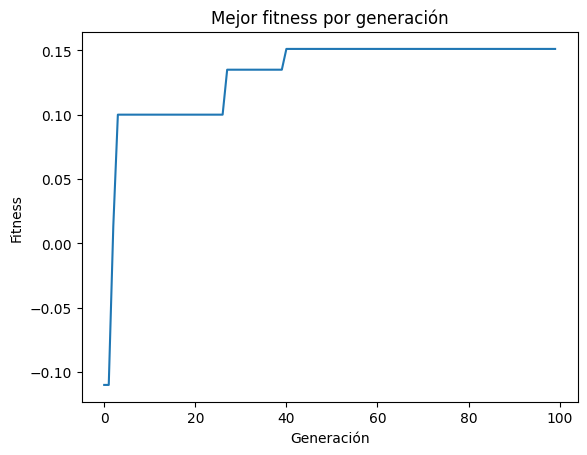

Mejor cromosoma fitness: 0.15120424713647262
IBM 0.29431006365183615
Microsoft 0.2991606341944071
BP 0.21171318124279612
Intel 0.20115763226644368
Ford 0.10095242156097761
Exxon 0.26580456773698297
Toyota 0.009377510119998388
Bayer 0.28079029539738626
Samsung 0.12072686143462723
L'Oréal 0.0455134897439398
Airbus 0.10550529936324679


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 100
Pc: 0.2
Pm: 0.6
C: 0.2


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.05379657 0.         0.         0.08551807 0.1112264  0.0034532
 0.02433237 0.05137901 0.         0.11757138 0.0483709  0.12643888
 0.00286126 0.05100015 0.00266337 0.01317042 0.12712063 0.
 0.06277231 0.1183251 ] , Mejor fitness: -0.12680898178491198
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0789691290116166, 0.0, 0.03779297108078949, 0.004748884846141218, 0.08711804014156574, 0.003047453015698606, 0.009307174474281652, 0.03987702441331248, 0.0007331748255533562, 0.04802338282955079, 0.01822795111409478, 0.06593496938251715, 0.0025250692545049336, 0.032865626723424614, 0.0017062474201798034, 0.00503770842146744, 0.0658402363750335, 0.0026200869367404207, 0.036108123990244406, 0.05133126731647859]



Generacion 0 completada
Mejor cromosoma: [0.05379657 0.         0.         0.08551807 0.1112264  0.0034532
 0.02433237 0.05137901 0.         0.11757138 0.0483709  0.12643888
 0.00286126 0.05100015 0.00266337 0.0131704

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.09902248
 0.         0.1298005  0.09954584 0.         0.         0.
 0.         0.         0.         0.         0.53327744 0.
 0.13835374 0.        ] , Mejor fitness: 0.1265323730806766
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002781156637704019, 0.03998919478299129, 0.02746191934197759, 0.013685928261118066, 0.04305421590201901, 0.0, 0.0, 0.028578283261672922, 0.0, 0.002680282977354254, 0.06908741681123984, 0.0, 0.0, 0.0023017470942545285]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.09902248
 0.         0.1298005  0.09954584 0.         0.         0.
 0.         0.         0.         0.         0.53327744 0.
 0.13835374 0.        ] , Mejor fitness: 0.1265323730806766
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0030359626062229175, 0.0, 0.0, 0.0, 0.013752490494979359, 0.0, 0.0, 0.08459999641206117, 0.005267914900235493, 0.007557846923613243, 0.04712534228615143, 0.0, 0.0, 0.014630323332653582, 0.0, 0.0, 0.25858257729998196, 0.0, 0.004935487164288531, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.09902248
 0.         0.1298005  0.09954584 0.         0.         0.
 0.         0.         0.         0.         0.53327744 0.
 0.13835374 0.        ] , Mejor fitness: 0.1265323730806766
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.02334970741754882, 0.0, 0.0, 0.0, 0.0011315279430730643, 0.0, 0.0, 0.07999437775866264, 0.005267914900235493, 0.0126409637507001, 0.02341192632215121, 0.0, 0.0, 0.02421840203077463, 0.0, 0.0, 0.25858257729998196, 0.0, 0.0023200685158610624, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.09902247836352333,...  0.126532
1   [0.0, 0.0, 0.02295049463956565, 0.0, 0.0, 0.0,...  0.110050
2   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13652784...  0.058229
3   [0.19879420941574305, 0.018608676560108693, 0....  0.052532
4   [0.006071925212445835, 0.0, 0.13485951

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.         0.03234345 0.         0.         0.02478611 0.
 0.00607324 0.06468044 0.         0.08110513 0.09252104 0.
 0.02537278 0.06104928 0.         0.05202523 0.         0.09466504
 0.09173737 0.08929339] , Mejor fitness: 0.1265323730806766
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0030359626062229175, 0.0, 0.0, 0.0, 0.0019002901864577824, 0.0, 0.0, 0.06372473427821297, 0.0, 0.033767264690646864, 0.00670919753042752, 0.05419528994595212, 0.0, 0.025216332966756398, 0.0, 0.0048427026339066094, 0.2792716945091215, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.09069387 0.         0.         0.         0.         0.07745926
 0.         0.01860852 0.         0.         0.         0.
 0.         0.02243369 0.         0.         0.07632307 0.
 0.         0.        ] , Mejor fitness: 0.29404443827836496
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0018056091474437986, 0.0, 0.02015623914285946, 0.0, 0.0, 0.0024792935991266975, 0.0, 0.0, 0.0, 0.0, 0.03569761476557102, 0.0031129168746408366, 0.0, 0.003143703556611133, 0.007506410734178748, 0.003220548576096205, 0.0030303381021914103, 0.0029627808124007005, 0.018375737300416507, 0.03069948674056369]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 50 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.
 0.         0.         0.04574024 0.05631375 0.03172163 0.
 0.         0.         0.02481099 0.02344398 0.         0.03701669
 0.06971299 0.        ] , Mejor fitness: 0.29404443827836496
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.010600419062699463, 0.018838746273194443, 0.0, 0.005270148065262515, 0.0, 0.0002541250744416912, 0.008203362090745637, 0.033049071806456526, 0.027774857076487393, 0.031558196008595454, 0.0034939920629619373, 0.010888726329750765, 0.014721274902569394, 0.0, 0.004652192812268518, 0.003424660769000854, 0.0, 0.02325672898859099, 0.0]



Generacion 50 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.
 0.         0.         0.04574024 0.05631375 0.03172163 0.
 0.         0.         0.02481099 0.02344398 0.         0.03701669
 0.06971299 0.        ] , Mejor fitness: 0.29404443827836496
Porcentaje d

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 60 completada
Mejor cromosoma: [0.         0.         0.         0.         0.01149072 0.
 0.         0.04616792 0.0698387  0.01966503 0.02798415 0.00392677
 0.         0.         0.00406235 0.00996774 0.0507592  0.029262
 0.0678482  0.        ] , Mejor fitness: 0.29404443827836496
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.011662468747949229, 0.0, 0.00043175973849424176, 0.000968136634476835, 0.032676157201448924, 0.007245741418628283, 0.012005817114531959, 0.0, 0.0, 0.0, 0.0020311764239081655, 0.0014690989792404464, 0.025673202565994924, 0.0, 0.0, 0.034474317260933945]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 70 completada
Mejor cromosoma: [0.         0.         0.         0.         0.05182817 0.07759244
 0.01029172 0.01335025 0.         0.08411231 0.         0.09684546
 0.03157056 0.         0.05889148 0.         0.03944519 0.
 0.03019509 0.        ] , Mejor fitness: 0.29404443827836496
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0013512809265758818, 0.028513070927227394, 0.0, 0.007891313450064398, 0.03396220117168698, 0.00398141096990805, 0.014035734509400079, 0.011371445539515392, 0.0038409501570844775, 0.0, 0.011538713290982628, 0.0, 0.014241688357558947, 0.0005638990783689125, 0.01989025029982079]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 75 completada
Mejor cromosoma: [0.08547225 0.         0.         0.         0.05622864 0.06452596
 0.05105216 0.         0.07541148 0.02557899 0.00956519 0.08981115
 0.         0.02699653 0.00412585 0.09165287 0.         0.07624175
 0.         0.        ] , Mejor fitness: 0.29404443827836496
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.025275282178853095, 0.0, 0.0021039836062064056, 0.0, 0.0, 0.0, 0.006909513425092995, 0.0, 0.004492674989052758, 0.002072111483984518, 0.009994131175795517, 0.0055156926181592295, 0.024435456168920587, 0.0176886471832013, 0.0, 0.028375499617181322, 0.0030643153619630548, 0.0046862955719619405, 0.0, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.08547225250615775, 0.0, 0.0, 0.0, 0.0562286...  0.294044
1   [0.07369046445177392, 0.029311404546367825, 0....  0.217751
2   [0.03304053679419141, 0.0, 0.03731020334104153...  0.182486
3   [0.0650294394693736, 0.0806

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 80 completada
Mejor cromosoma: [0.         0.05735359 0.         0.         0.         0.02233781
 0.09957926 0.07779986 0.         0.         0.07847915 0.
 0.05096727 0.09346681 0.         0.03801156 0.04879398 0.05559558
 0.0311756  0.        ] , Mejor fitness: 0.29404443827836496
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.022845332261443987, 0.022417293874521217, 0.030158228385905532, 0.03899443346860437, 0.032475737576722216, 0.0019004557009257295, 0.0, 0.0, 0.010521353417145041, 0.026087449877560856, 0.015135941151277456, 0.0, 0.005333091224474751, 0.012910705597996598, 0.011062805151076473, 0.01610053482982644, 0.0, 0.004405968308426611, 0.02053272767411044, 0.006474939828251348]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 90 completada
Mejor cromosoma: [0.04310691 0.         0.00391816 0.02648189 0.09428243 0.
 0.         0.0159712  0.         0.00187911 0.         0.
 0.         0.0647352  0.08139418 0.01729451 0.         0.08670083
 0.03724475 0.        ] , Mejor fitness: 0.29404443827836496
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0022235360350161383, 0.0, 0.0, 0.0036501524766082375, 0.00787566201316935, 0.0, 0.009555877293559334, 0.0, 0.04451126608677153, 0.0037214965583316053, 0.0, 0.0134650698157333, 0.0, 0.0, 0.0, 0.018114935715137316, 0.0, 0.0, 0.034990150421611535, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 99 completada
Mejor cromosoma: [0.06489401 0.08199936 0.05414521 0.         0.         0.05772865
 0.         0.00982435 0.         0.         0.         0.
 0.         0.         0.01894577 0.         0.         0.03360036
 0.08701429 0.06082001] , Mejor fitness: 0.29404443827836496
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0648940116639428, 0.08199936276597747, 0.05...  0.294044
1   [0.0, 0.0015736124078027604, 0.0, 0.0, 0.05601...  0.217751
2   [0.0, 0.018652180729499746, 0.0912699921106534...  0.213703
3   [0.0, 0.0, 0.0, 0.08386144941452899, 0.0, 0.09...  0.182486
4   [0.09398783126096569, 0.09604313998896295, 0.0...  0.165415
5   [0.03848091667517626, 0.023760626103402682, 0....  0.153226
6   [0.03012056334826914, 0.059003736835004976, 0....  0.151417
7   [0.0, 0.0, 0.04854859392352902, 0.0, 0.0004874...  0.146085
8   [0.0, 0.028707017

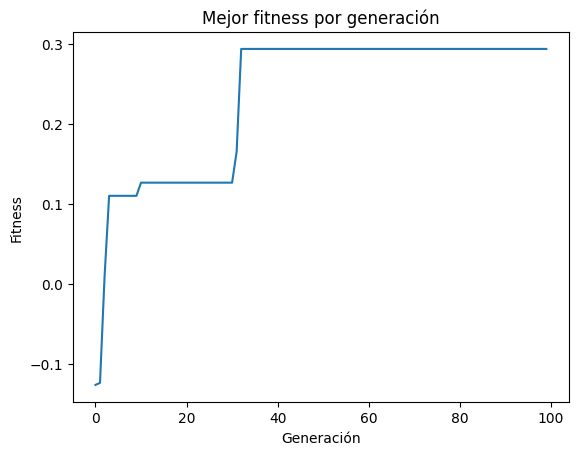

Mejor cromosoma fitness: 0.29404443827836496
IBM 0.0648940116639428
Nvidia 0.08199936276597747
Kellogs 0.054145210585621585
UPS 0.05772865403366867
Intel 0.00982435473031349
Nestlé 0.018945770838531953
Netflix 0.03360035941468236
L'Oréal 0.08701429412462827
Airbus 0.060820013403359456


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 100
Pc: 0.2
Pm: 0.6
C: 0.6


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.31051836 0.00054785 0.         0.         0.03696383 0.
 0.         0.0444629  0.         0.09152728 0.07661285 0.08803776
 0.01252112 0.0144845  0.         0.08750256 0.05375993 0.04447375
 0.05413884 0.08444846] , Mejor fitness: -0.15015307698476696
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.11883853777381712, 0.0, 0.06056219278737965, 0.0, 0.02803065595311808, 0.03745744983038206, 0.011472324609000805, 0.06023182357581157, 0.0, 0.06694983078482003, 0.0407816907534668, 0.06489966650677079, 0.03241821790418997, 0.029309660355009738, 0.019566991232136545, 0.04563792829758885, 0.0357492465072399, 0.0006250578238558733, 0.031910765197895596, 0.0606885729351111]



Generacion 0 completada
Mejor cromosoma: [0.31051836 0.00054785 0.         0.         0.03696383 0.
 0.         0.0444629  0.         0.09152728 0.07661285 0.08803776
 0.01252112 0.0144845  0.         0.08750256 0.05375993 0.04447375
 0.05413884 0.08444846

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.29848301 0.         0.12189578 0.07310153 0.         0.
 0.         0.05358104 0.         0.05262014 0.11212678 0.2721166
 0.22826943 0.         0.13210507 0.14256512 0.25852946 0.04625991
 0.         0.        ] , Mejor fitness: -0.02451815491460551
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.06616317553603843, 0.015832604158867534, 0.015816701170569714, 0.0, 0.00562634950100096, 0.0, 0.0, 0.11117944005319717, 0.07546264013409312, 0.0, 0.0, 0.10239076572984494, 0.01705685155472909, 0.0, 0.0056750639283797595, 0.09287529565470551, 0.01482356299576439, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.         0.02268789 0.         0.         0.12304444 0.
 0.         0.17929012 0.         0.23039501 0.         0.
 0.         0.12651316 0.         0.10665336 0.19929271 0.
 0.00673328 0.00539002] , Mejor fitness: 0.057913701991161325
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0496740834661524, 0.07282670333401138, 0.009587019986610823, 0.0, 0.0, 0.016333383866527017, 0.0, 0.12616823249695336, 0.0, 0.040899545626018816, 0.0, 0.0, 0.0, 0.0051913190009372666, 0.025766770652812764, 0.0, 0.20179409431218187, 0.0, 0.0, 0.0026950080344000657]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.15226897
 0.         0.35973364 0.         0.         0.         0.
 0.04961472 0.         0.         0.09476284 0.34361984 0.
 0.         0.        ] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.00638969171782499, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15652508430185086, 0.0, 0.0, 0.0, 0.042027405971793476, 0.0, 0.0, 0.0, 0.0, 0.17656871135568916, 0.0, 0.0, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.15226896669658377,...  0.114999
1   [0.0, 0.02268788793495295, 0.0, 0.0, 0.1230444...  0.057914
2   [0.012343929632760394, 0.0, 0.0, 0.0, 0.0, 0.0...  0.025630
3   [0.0, 0.0, 0.09214917466751137, 0.0, 0.0, 0.0,...  0.001699
4   [0.0, 0.09877298367772133, 0.0663376733605838,... -0.011873
5   [0.09398389872077925, 0.15556786579159118, 0.1... -0.024

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.15226897
 0.         0.35973364 0.         0.         0.         0.
 0.04961472 0.         0.         0.09476284 0.34361984 0.
 0.         0.        ] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.033726274131052496, 0.015876330386692967, 0.029376479193268766, 0.0, 0.0, 0.0, 0.0, 0.17525518497102494, 0.0, 0.03790560414935672, 0.0, 0.009290301719250127, 0.0, 0.0, 0.0, 0.0, 0.19332588607201834, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.         0.         0.         0.         0.         0.15226897
 0.         0.35973364 0.         0.         0.         0.
 0.04961472 0.         0.         0.09476284 0.34361984 0.
 0.         0.        ] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.1289502767497486, 0.0, 0.0, 0.0, 0.0, 0.002532418691554011, 0.0, 0.17456210625785074, 0.0, 0.002715015598367465, 0.0, 0.022752670535421543, 0.0, 0.0, 0.0, 0.0, 0.2070902823620709, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 50 completada
Mejor cromosoma: [0.22748197 0.10004462 0.23311513 0.07500566 0.03760383 0.19962625
 0.02332395 0.         0.         0.         0.         0.18598185
 0.17389982 0.068532   0.03414597 0.14757651 0.         0.16848529
 0.         0.        ] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.07454625867506193, 0.0, 0.007290501697371531, 0.0, 0.0, 0.005206555898057115, 0.0, 0.1468024837418423, 0.0, 0.0, 0.0, 0.04797091036311356, 0.0, 0.010355003322666399, 0.0, 0.0, 0.21221455383522037, 0.0, 0.0, 0.0]



Generacion 50 completada
Mejor cromosoma: [0.22748197 0.10004462 0.23311513 0.07500566 0.03760383 0.19962625
 0.02332395 0.         0.         0.         0.         0.18598185
 0.17389982 0.068532   0.03414597 0.14757651 0.         0.16848529
 0.         0.        ] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.07454625867506193, 0.0, 0.0072905

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 60 completada
Mejor cromosoma: [0.         0.         0.         0.00355009 0.         0.09015971
 0.13880627 0.297717   0.         0.07713467 0.         0.2497508
 0.         0.         0.15187725 0.1323116  0.         0.
 0.14851805 0.04585414] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.03899352939073978, 0.0, 0.0, 0.0, 0.0, 0.005206555898057115, 0.0, 0.11514920640814871, 0.0, 0.022037395851589182, 0.0, 0.04797091036311356, 0.0, 0.010355003322666399, 0.0, 0.031164387891702228, 0.2217184888132952, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 70 completada
Mejor cromosoma: [0.         0.19209411 0.11658672 0.         0.17087413 0.
 0.         0.         0.         0.0738402  0.26893066 0.15596571
 0.06849613 0.19367348 0.         0.         0.1675722  0.
 0.         0.10274553] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.05316391417676982, 0.0, 0.03770744856961114, 0.0, 0.04942635698307652, 0.03929546027730594, 0.0, 0.11514920640814871, 0.0, 0.022037395851589182, 0.0, 0.013462368816171416, 0.0, 0.023227323396564175, 0.0, 0.04266540154705575, 0.2157010872965517, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 75 completada
Mejor cromosoma: [0.         0.08450305 0.09538746 0.29852176 0.         0.2264349
 0.04702296 0.26476635 0.01749259 0.14804535 0.01018714 0.1167182
 0.0695856  0.         0.06229688 0.         0.         0.17059115
 0.14596    0.        ] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.04574540286966916, 0.0, 0.027166882053177462, 0.0, 0.0, 0.05362090178469068, 0.0, 0.09650628647532838, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02355737473855342, 0.0, 0.01150101365535352, 0.2157010872965517, 0.0, 0.08617262759892527, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.08450304569257769, 0.09538746273538701...  0.114999
1   [0.17034379160375426, 0.0, 0.09000071528724611...  0.081656
2   [0.0, 0.0, 0.0, 0.2657784753975889, 0.0, 0.293...  0.073359
3   [0.0, 0.001740965150630358, 0.0, 0.0, 0.108304...  0.068994
4   [0.11800259930388073, 0.0, 0.0, 0.193576010

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 80 completada
Mejor cromosoma: [0.         0.         0.         0.1991508  0.         0.04852338
 0.         0.         0.1713518  0.         0.12052473 0.01935309
 0.14376449 0.         0.         0.05095643 0.06339613 0.19659912
 0.         0.17830833] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.012015499534120877, 0.0, 0.007290501697371531, 0.0, 0.0008585900072437868, 0.02693582762679907, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02313891165749305, 0.0, 0.034669015971620504, 0.0, 0.0632372882347243, 0.21144843236108235, 0.0, 0.0, 0.029916169649173183]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 90 completada
Mejor cromosoma: [0.0845861  0.2725584  0.03221702 0.         0.         0.
 0.0182369  0.         0.         0.29794852 0.         0.22970499
 0.         0.26231734 0.         0.         0.         0.16700376
 0.14447333 0.        ] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.08428942453712206, 0.0, 0.023399013896618588, 0.023433812721465865, 0.0, 0.0, 0.0, 0.042388974754587826, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11331492596959908, 0.0, 0.0, 0.13222438152524174, 0.028059812009369946, 0.015543277471516835, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 99 completada
Mejor cromosoma: [0.         0.         0.10153203 0.         0.18614333 0.
 0.         0.29446918 0.1439716  0.29266138 0.         0.
 0.23874184 0.16775194 0.01155131 0.23156513 0.00608964 0.
 0.         0.2755728 ] , Mejor fitness: 0.11499866608190651
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.1015320332997176, 0.0, 0.18614333...  0.114999
1   [0.0469193778171713, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.091580
2   [0.0, 0.0, 0.1349048080943348, 0.0759666568521...  0.081656
3   [0.0, 0.17925561618449437, 0.0, 0.0, 0.0, 0.15...  0.073359
4   [0.2973266394757706, 0.0, 0.0, 0.2051153997238...  0.068994
5   [0.11015131427893228, 0.23388357727314818, 0.0...  0.057914
6   [0.0, 0.0, 0.2242819900865948, 0.0, 0.0, 0.0, ...  0.056824
7   [0.17815984413841318, 0.0, 0.0, 0.061349801970...  0.043419
8   [0.03527982712569564, 0.0, 0.0, 0

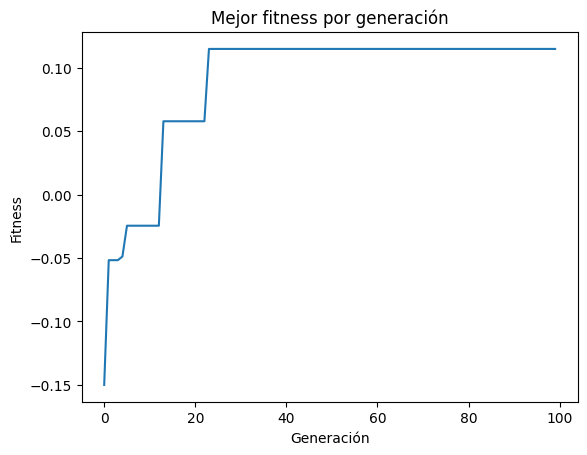

Mejor cromosoma fitness: 0.11499866608190651
Kellogs 0.1015320332997176
BP 0.18614333392999416
Intel 0.294469180328922
Ford 0.14397160385019858
Exxon 0.29266138374938416
Ikea 0.23874183862624312
Bayer 0.1677519401655103
Nestlé 0.011551310164702122
Samsung 0.23156513004034818
Telefónica 0.0060896410691240405
Airbus 0.27557279646921956


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 100
Pc: 0.6
Pm: 0.5
C: 0.2


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.         0.         0.03340641 0.         0.07946981 0.10234334
 0.         0.02872896 0.         0.18772716 0.         0.20714225
 0.03491227 0.00761169 0.08772383 0.14504364 0.08589067 0.
 0.         0.        ] , Mejor fitness: -0.13507686884688755
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.06349125286886476, 0.009037781138614708, 0.055890466322058366, 0.011787891499516753, 0.06724977777199975, 0.04267344555106976, 0.019824178709198653, 0.07070195567422904, 0.02874268295832222, 0.043080592103881744, 0.0331586048486508, 0.05095374546744552, 0.017517922302298622, 0.030523985816196038, 0.013297630055799758, 0.07030277668346113, 0.08151348330450749, 0.002625897399131014, 0.037699560010635944, 0.0054137754312361015]



Generacion 0 completada
Mejor cromosoma: [0.         0.         0.03340641 0.         0.07946981 0.10234334
 0.         0.02872896 0.         0.18772716 0.         0.20714225
 0.03491227 0.00761169 0.

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.         0.01109604 0.         0.01554189 0.01567704 0.08323312
 0.         0.         0.06293298 0.02708543 0.05133442 0.
 0.0335585  0.         0.         0.         0.         0.
 0.         0.03593086] , Mejor fitness: 0.14307948816827085
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.025033078467402152, 0.0, 0.0, 0.0, 0.0, 0.03838067322234044, 0.0, 0.017170429615326013, 0.027304387855802675, 0.0, 0.0, 0.029708721284017768, 0.0, 0.015024908270247727, 0.3533261378908185, 0.004212030152375441, 0.0, 0.006165771724113981]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.         0.02900539 0.04286231 0.03988712 0.0725894  0.
 0.         0.07475661 0.00627647 0.         0.         0.
 0.08813455 0.07345114 0.00340191 0.07302236 0.05209433 0.
 0.07243056 0.00171839] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.01156262052797326, 0.0069886675007424515, 0.0009918113132729167, 0.008441905475916599, 0.0, 0.01964561613972927, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017151292776083706, 0.033789917780088184, 0.020708072859667304, 0.0, 0.03985148180519675, 0.01250541929666242]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.         0.09728943 0.00581906 0.         0.03501901 0.03525176
 0.06873965 0.02979172 0.02339067 0.         0.05002778 0.
 0.08480123 0.         0.09459802 0.         0.         0.03571696
 0.05925831 0.04708919] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.024245713564218133, 0.0, 0.0, 0.006774159570519545, 0.0, 0.01329892599436715, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03600783576918673, 0.0, 0.036855604238060835, 0.0, 0.0, 0.0, 0.041829960058479373, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.09728943338843657, 0.00581905554229116...  0.351997
1   [0.0, 0.056774404563766284, 0.0, 0.0, 0.042660...  0.348806
2   [0.0, 0.0, 0.09508764472242065, 0.0, 0.0251382...  0.326351
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.002280692775290431...  0.301854
4   [0.0, 0.0, 0.0, 0.06114925390261135, 0.0, 0.08...  0.300415
5   [0.0238793361

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.02498979 0.         0.00427871 0.         0.         0.01371271
 0.02089444 0.         0.02339067 0.02300525 0.06363087 0.
 0.         0.         0.         0.         0.         0.01000816
 0.         0.        ] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.01909396726343883, 0.018882701908737753, 0.00909802219300132, 0.0, 0.0, 0.00010233941645855228, 0.0, 0.007475407408970703, 0.0022368171984548436, 0.028399111816651293, 0.0, 0.0, 0.05508611767328998, 0.010399458085504808, 0.0, 0.0, 0.0, 0.0, 0.019335867323771273, 0.00353428108931515]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.         0.02390251 0.09630074 0.04013226 0.         0.05404501
 0.07617083 0.         0.         0.02659919 0.05613173 0.00629667
 0.00732539 0.00859839 0.         0.07143125 0.05423627 0.
 0.00566513 0.05342639] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.033291464139802524, 0.01422912799589733, 0.0, 0.023503114308651075, 0.024099064577289508, 0.0, 0.0, 0.004034264970927482, 0.0, 0.008040256315455753, 0.00928846403269038, 0.0, 0.0, 0.0, 0.0, 0.013921872213079934, 0.008108543513008637, 0.02647707557471707, 0.0, 0.002469153302317262]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 50 completada
Mejor cromosoma: [0.         0.         0.07811792 0.08320174 0.07565925 0.03190951
 0.         0.         0.03724755 0.         0.08131638 0.08878933
 0.         0.         0.         0.08603218 0.         0.07054597
 0.         0.0060746 ] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.007199716968371406, 0.031495069868417366, 0.004574416686874006, 0.0, 0.003523906281670453, 0.01733500893893849, 0.03252743426553582, 0.029253387514068297, 0.0, 0.015017876256377894, 0.0, 0.014705581020309623, 0.0, 0.009069901987985508, 0.0, 0.0023612062945468915, 0.010292215658225735, 0.0]



Generacion 50 completada
Mejor cromosoma: [0.         0.         0.07811792 0.08320174 0.07565925 0.03190951
 0.         0.         0.03724755 0.         0.08131638 0.08878933
 0.         0.         0.         0.08603218 0.         0.07054597
 0.         0.0060746 ] , Mejor fitness: 0.35199716489282484
Porcentaje de ap

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 60 completada
Mejor cromosoma: [0.         0.03405571 0.03241583 0.         0.03018146 0.
 0.         0.07799914 0.0579853  0.09273552 0.         0.
 0.         0.         0.         0.05350155 0.         0.02515686
 0.         0.01663162] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.02685106919954551, 0.0, 0.01055531096492548, 0.021834709458065784, 0.0, 0.0, 0.012977058309155865, 0.0, 0.016892456754408505, 0.0, 0.024380835501774015, 0.00575233712443598, 0.01579194636847432, 0.0, 0.0, 0.004344559470502607, 0.008850257202858836, 0.0, 0.018331411092069226]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 70 completada
Mejor cromosoma: [0.         0.         0.         0.03505945 0.         0.02218161
 0.         0.0158881  0.00206226 0.03060674 0.04529226 0.
 0.         0.         0.05817498 0.         0.04194521 0.02106049
 0.         0.07189581] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0022590772111567127, 0.004721081572196384, 0.0, 0.0, 0.0, 0.02104829624077914, 0.0, 0.009780600923264693, 0.0, 0.0036679770067535203, 0.013885421696923307, 0.00861586453269183, 0.0, 0.0, 0.001810944530322267, 0.00860021335154626, 0.0, 0.022021138505486614, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 75 completada
Mejor cromosoma: [0.         0.09870735 0.         0.         0.         0.0527077
 0.         0.07979261 0.         0.03060674 0.09243671 0.
 0.         0.03792116 0.06813206 0.         0.07443573 0.
 0.07171592 0.00457669] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.022786647116641294, 0.007689618263114451, 0.0, 0.0, 0.03610739960133642, 0.0010430333961455984, 0.031047923207928565, 0.014835211268538285, 0.0, 0.01051822527628966, 0.0, 0.0, 0.019169144468626532, 0.008667728975002864, 0.0, 0.0, 0.0, 0.00441744984564827, 0.010544276697549083, 0.02151683457486643]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.09870735249172191, 0.0, 0.0, 0.0, 0.05...  0.351997
1   [0.0, 0.0, 0.0, 0.0, 0.05382576061898945, 0.02...  0.348806
2   [0.03495901892666999, 0.0, 0.0, 0.058736967767...  0.326351
3   [0.0681331329406981, 0.06651355735893748, 0.0,...

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 80 completada
Mejor cromosoma: [0.         0.08110599 0.         0.         0.02097381 0.0527077
 0.04969239 0.         0.03594199 0.09827985 0.01043437 0.03038127
 0.07727512 0.02840053 0.         0.         0.07443573 0.0328803
 0.07376155 0.        ] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [8.628994931498825e-05, 0.012500573049765418, 0.0, 0.017409938425681105, 0.00498332255751004, 0.018309146352989768, 0.0, 0.0, 0.0018771653257147582, 0.013862692465178773, 0.0005815823559626066, 0.025452989397534556, 0.02101844543050555, 0.020989703563590867, 0.0, 0.0, 0.0, 0.0, 0.014725816901216627, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 90 completada
Mejor cromosoma: [0.         0.06146355 0.         0.         0.         0.
 0.         0.07142259 0.0547668  0.0243105  0.07788185 0.
 0.         0.01400781 0.08569086 0.         0.08686856 0.
 0.         0.08478822] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0015518194880109416, 0.0, 0.0, 0.0, 0.0, 0.0, 7.189038374365575e-05, 0.04689867583851853, 0.022151983173772753, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006817687314625165, 0.014204039301256034, 0.0038221194317779265, 0.010720362529167284, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 99 completada
Mejor cromosoma: [0.         0.02564324 0.         0.         0.02985372 0.00349625
 0.02659573 0.         0.         0.02385107 0.02144002 0.
 0.         0.         0.         0.02008752 0.         0.
 0.         0.0754237 ] , Mejor fitness: 0.35199716489282484
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.025643236741299605, 0.0, 0.0, 0.029853...  0.351997
1   [0.05435424897822083, 0.0, 0.0, 0.043873446169...  0.348806
2   [0.0860790022428436, 0.0, 0.0, 0.0478969011191...  0.326351
3   [0.0, 0.0, 0.06391444834282771, 0.0, 0.0168102...  0.301854
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.08060681737033147,...  0.300415
5   [0.035693804162746194, 0.061783756012926516, 0...  0.299348
6   [0.0, 0.0, 0.027072383939408518, 0.0, 0.0, 0.0...  0.289895
7   [0.06827398116404586, 0.0, 0.03420386278050567...  0.289082
8   [0.05625868632584792, 0.0

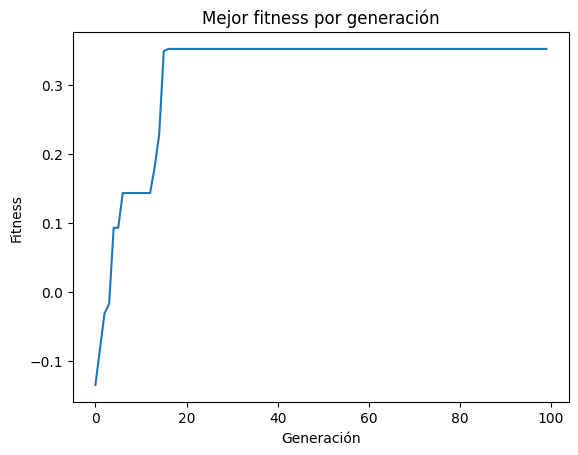

Mejor cromosoma fitness: 0.35199716489282484
Nvidia 0.025643236741299605
BP 0.02985371714550047
UPS 0.003496251998782274
Amazon 0.02659573319197968
Exxon 0.02385106932536987
Toyota 0.02144001521943464
Samsung 0.020087517988971484
Airbus 0.07542370036911494


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 100
Pc: 0.6
Pm: 0.5
C: 0.6


/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.0474113  0.06020791 0.01401587 0.01942995 0.08790596 0.02199962
 0.08234064 0.05853203 0.0107598  0.0442835  0.09689168 0.
 0.         0.0120669  0.04799994 0.06309393 0.23527349 0.02180293
 0.         0.07598455] , Mejor fitness: -0.17265747940873505
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.06003589202377234, 0.012314037507835253, 0.07248674272278854, 0.013085573822831202, 0.05036849133360258, 0.033518225328817486, 0.035518615755341376, 0.025275754093994386, 0.013119588256911393, 0.05453872237518323, 0.016993253484842714, 0.04041943279336547, 0.01513893870446291, 0.006033451457069194, 0.023978650527639464, 0.048855077481525955, 0.07227954444127438, 0.017949720229416814, 0.05402845368919584, 0.04790012763720307]



Generacion 0 completada
Mejor cromosoma: [0.0474113  0.06020791 0.01401587 0.01942995 0.08790596 0.02199962
 0.08234064 0.05853203 0.0107598  0.0442835  0.09689168 0.
 0.         0.0120669  0.04799994

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.0689489  0.         0.06618704 0.         0.         0.
 0.         0.         0.         0.21316536 0.         0.
 0.         0.         0.         0.         0.37220672 0.
 0.21473046 0.06476152] , Mejor fitness: 0.09377141971262837
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.018268130010329033, 0.11074324245169806, 0.0, 0.0, 0.027134156575169797, 0.0, 0.03036005838390101, 0.0, 0.0, 0.0, 0.01157919344795325, 0.0, 0.0, 0.1333159896933045, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.0689489  0.         0.06618704 0.         0.         0.
 0.         0.         0.         0.21316536 0.         0.
 0.         0.         0.         0.         0.37220672 0.
 0.21473046 0.06476152] , Mejor fitness: 0.09377141971262837
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.01815546797250298, 0.0, 0.0, 0.0, 0.00901378887391741, 0.0, 0.009982062344055798, 0.13665686849589279, 0.0, 0.029280655061853615, 0.0, 0.09921453829187471, 0.0, 0.01254942998190101, 0.0, 0.0, 0.11533651349815532, 0.0, 0.05285191746027239, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 25 completada
Mejor cromosoma: [0.0689489  0.         0.06618704 0.         0.         0.
 0.         0.         0.         0.21316536 0.         0.
 0.         0.         0.         0.         0.37220672 0.
 0.21473046 0.06476152] , Mejor fitness: 0.09377141971262837
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.022573951037766937, 0.0, 0.0, 0.0, 0.04369924474987631, 0.0, 0.0, 0.07659550887832167, 0.0, 0.08074946422820259, 0.0, 0.02256997430607365, 0.0, 0.013865681385452973, 0.0, 0.0, 0.2396565688865957, 0.0, 0.0, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.06894889745294494, 0.0, 0.06618703943072153...  0.093771
1   [0.07820578563997084, 0.0, 0.25241738319689255...  0.085688
2   [0.13346910496942652, 0.0, 0.10206722167218431...  0.043889
3   [0.3293464443035088, 0.0, 0.0, 0.0, 0.01630224...  0.025855
4   [0.0, 0.0, 0.013663362166054072, 0.0, 0.187500...  0.010658
5   [0.2788201443226

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 30 completada
Mejor cromosoma: [0.         0.         0.         0.         0.04573574 0.
 0.         0.22749932 0.         0.16309256 0.04071207 0.
 0.         0.         0.01378534 0.1592737  0.27803114 0.
 0.07187014 0.        ] , Mejor fitness: 0.11982500484336711
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.05704839976423941, 0.0, 0.0, 0.0, 0.1037576026166831, 0.0, 0.0, 0.07040584565744501, 0.0, 0.11573708385769182, 0.0, 0.012470269782876997, 0.0, 0.017966077463888862, 0.0, 0.0, 0.24248207528313487, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 40 completada
Mejor cromosoma: [0.20697507 0.         0.29261669 0.1604462  0.08087273 0.28859372
 0.00550898 0.         0.         0.05218023 0.14961252 0.02859327
 0.16939004 0.01969786 0.         0.24093123 0.         0.06050096
 0.12683793 0.        ] , Mejor fitness: 0.2759045483752155
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.026911342757285107, 0.0, 0.0, 0.0, 0.0861899635697448, 0.0, 0.0, 0.03511300715667126, 0.0, 0.02158488005733063, 0.0, 0.0, 0.0, 0.013865681385452973, 0.0, 0.0, 0.2324843752739364, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 50 completada
Mejor cromosoma: [0.28734607 0.         0.         0.19106184 0.         0.06476493
 0.05104144 0.29833004 0.08920147 0.         0.06300935 0.15061114
 0.22450626 0.16519934 0.         0.         0.         0.
 0.         0.07963921] , Mejor fitness: 0.2759045483752155
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.004522540631672157, 0.0, 0.032963818446925384, 0.0033404887211142095, 0.0, 0.020262129634876995, 0.006241067282355028, 0.09812789978069175, 0.0, 0.04130884242028353, 0.0035013147583859406, 0.0, 0.0, 0.0051256161568758885, 0.0, 0.0, 0.04423195626846503, 0.0, 0.0335032188175966, 0.0]



Generacion 50 completada
Mejor cromosoma: [0.28734607 0.         0.         0.19106184 0.         0.06476493
 0.05104144 0.29833004 0.08920147 0.         0.06300935 0.15061114
 0.22450626 0.16519934 0.         0.         0.         0.
 0.         0.07963921] , Mejor fitness: 0.2759045483752155
Porcentaje de aparición del mejor cromosoma: 1.0
Cro

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 60 completada
Mejor cromosoma: [0.         0.         0.16113924 0.24554086 0.06568063 0.
 0.28220454 0.         0.18377829 0.         0.25111816 0.
 0.22908261 0.         0.29898659 0.20851606 0.         0.02135839
 0.         0.        ] , Mejor fitness: 0.2759045483752155
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.013317127541431672, 0.0, 0.043133340692068485, 0.0, 0.037070579517111873, 0.0, 0.0042448315512784935, 0.0, 0.0, 0.016248667766615998, 0.0, 0.0, 0.0, 0.04103630771487948, 0.0, 0.0, 0.04446552340836493, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 70 completada
Mejor cromosoma: [0.         0.         0.         0.04422571 0.01173395 0.
 0.26332683 0.         0.         0.         0.         0.
 0.09738766 0.19476122 0.         0.16619939 0.04519819 0.
 0.08861397 0.10330878] , Mejor fitness: 0.2759045483752155
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.0, 0.0, 0.0, 0.034235827831919294, 0.022674816440855245, 0.0, 0.0, 0.019723962362952895, 0.0, 0.003410996822863177, 0.0, 0.016304132062048397, 0.0, 0.0, 0.05923127895259612, 0.0, 0.0, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 75 completada
Mejor cromosoma: [0.         0.         0.22086526 0.         0.         0.09515296
 0.         0.         0.         0.         0.05188494 0.150246
 0.18611216 0.27938745 0.15964566 0.23953198 0.28853782 0.
 0.         0.        ] , Mejor fitness: 0.2759045483752155
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.0, 0.021874824974887484, 0.0, 0.06655709541889446, 0.0, 0.0, 0.010052042527876991, 0.0, 0.0004171563117594368, 0.0035013147583859406, 0.0285257229765274, 0.01779792368831006, 0.013865681385452973, 0.0, 0.002071728943164375, 0.0, 0.0, 0.08275250095658887, 0.0]
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0, 0.0, 0.22086525998150275, 0.0, 0.0, 0.09...  0.275905
1   [0.2794762208435853, 0.25772388294083054, 0.0,...  0.237604
2   [0.23223492475375107, 0.0, 0.1611460450253773,...  0.119825
3   [0.0, 0.0, 0.0, 0.0, 0.09878435002655794, 0.10...  0.105396
4   [0.1674511689

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 80 completada
Mejor cromosoma: [0.         0.02471065 0.29809345 0.27624348 0.29227031 0.15966316
 0.24621823 0.         0.29442582 0.         0.27487514 0.
 0.14755761 0.03225722 0.06085519 0.05194482 0.         0.
 0.28289669 0.11274639] , Mejor fitness: 0.2759045483752155
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.009379844609591093, 0.045784215355568494, 0.0, 0.029150412509091537, 0.0, 0.0, 0.07017707883369063, 0.0, 0.0, 0.1151583016835453, 0.0, 0.0, 0.07605399279585887, 0.0, 0.02839512283494265, 0.05923127895259612, 0.07009369265332085, 0.15435323213596236, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 90 completada
Mejor cromosoma: [0.26683779 0.26759787 0.25211419 0.01549725 0.03975798 0.
 0.         0.         0.         0.07722269 0.16467299 0.18365763
 0.26135684 0.14211736 0.         0.         0.20184336 0.05715576
 0.         0.        ] , Mejor fitness: 0.2759045483752155
Porcentaje de aparición del mejor cromosoma: 1.0
Cromosoma consenso: [0.0, 0.036344062531984044, 0.05262960109190934, 0.0, 0.07704926285024534, 0.0, 0.0020120704304662507, 0.0, 0.0, 0.0, 0.0, 0.0213368574110231, 0.09031354557177372, 0.01326085723878943, 0.020383761858037863, 0.0, 0.05879385306866453, 0.054581365593336664, 0.016728617271071264, 0.0]





/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_14292/1743048303.py:14: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_14292/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as p

TypeError: 'NoneType' object is not subscriptable

In [18]:
arrayNPOB = [100, 150]
arrayNGEN = [50 ,100]
arrayPc = [0.4, 0.6]
arrayPm = [0.5, 0.6]
arrayC = [0.2, 0.6]



for NPOB in arrayNPOB:
    for NGEN in arrayNGEN:
        for Pc in arrayC:
            for Pm in arrayPm:
                for C in arrayC:
                  historicoBestFitness, BESTc, BESTf = entrenamiento(NPOB, NGEN, Pc, Pm, C)

                  plt.plot(historicoBestFitness)
                  plt.title("Mejor fitness por generación")
                  plt.xlabel("Generación")
                  plt.ylabel("Fitness")
                  plt.show()

                  print("Mejor cromosoma fitness:", BESTf)
                  #get the position of the genes that are not 0
                  genes = []
                  for i in range(20):
                      if BESTc[i] != 0:
                          print(data.iloc[i]["Empresa"], BESTc[i])




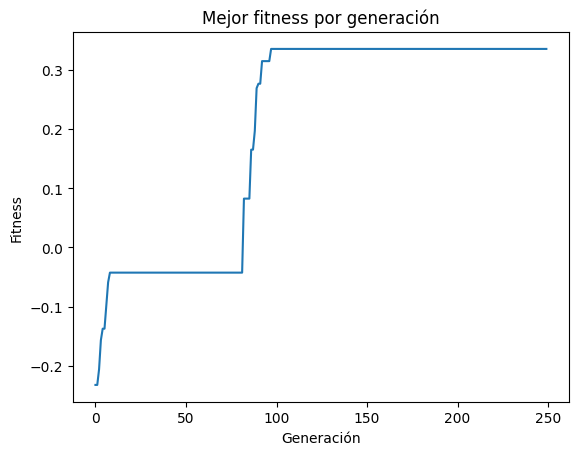

In [ ]:
# graph the best fitness
plt.plot(historicoBestFitness)
plt.title("Mejor fitness por generación")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.show()


In [ ]:
# get the position of the genes that are not 0
genes = []
for i in range(20):
    if BESTc[i] != 0:
        print(data.iloc[i]["Empresa"], BESTc[i])

IBM 0.06023513144946083
Nvidia 0.04501632648966117
Kellogs 0.046736322469162955
Microsoft 0.027321132573988872
Amazon 0.002532050546225451
Ford 0.08411822487744952
Exxon 0.19454869289704624
Pfizer 0.037608307023073856
Ikea 0.019690133607887142
Bayer 0.13909683098598108
Samsung 0.0004954564896036296
Telefónica 0.07377874310805525
L'Oréal 0.12719172754653618


In [ ]:
# hash of df
BESTf

0.3358454007619389